In [134]:
import pandas as pd
from pandas.api.types import is_numeric_dtype
from pathlib import Path
import seaborn as sns
import numpy as np
sns.set_context('talk')
sns.set_style('darkgrid')


In [3]:
def binarize_labels(df):
    df.iloc[:, :3] = df.iloc[:, :3].round()
    return df

In [4]:
dfs = []
for p in Path('annot_round1').glob('*/batch*.tsv'):
# for p in Path('annot_round1').glob('deu_Latn/batch*.tsv'):
    df = pd.read_csv(p, sep='\t')    
    if p.parent.name == 'deu_Latn' and p.name == 'batch0.tsv':
        
        print('Binarization for', p)
        df = binarize_labels(df)
    elif p.parent.name == 'gla_Latn' and p.name == 'batch0.tsv':
        # Laurie didn't explicitly labeled if the language was not correct        
        print('For gla_Latn empty "lang correct" means incorrect lang')        
        df.iloc[:,2] = df.iloc[:,2].fillna(0)
    df = df.rename(columns = {c: c.split('?')[0] for c in df.columns})
    if any(df[c].isnull().all() for c in df.columns if 'lang' in c):
        continue
    df['path'] = str(p)
    df['lang'] = p.parent.name
    dfs.append(df)
df = pd.concat(dfs, ignore_index=True).sort_values(by='lang')
df.sample(10)

Binarization for annot_round1/deu_Latn/batch0.tsv
For gla_Latn empty "lang correct" means incorrect lang


porn  unnatural  lang correct  \
2674   NaN        NaN           1.0   
1054   NaN        NaN           1.0   
2047   NaN        NaN           1.0   
679    NaN        NaN           1.0   
3232   NaN        NaN           1.0   
156    NaN        NaN           1.0   
2411   NaN        NaN           1.0   
1028   NaN        1.0           1.0   
569    NaN        NaN           1.0   
3547   NaN        NaN           1.0   

                                              text_show  \
2674  В большой комнате гремел телевизор: стрельба, ...   
1054  zavražděný osmiletý Matěj Toto je poslední z d...   
2047  Georg Friedrich Händel B' e ceòl-sgrìobhaiche ...   
679   Köprüler Malabadi Köprüsü Silvan ilçe merkezin...   
3232  रामगढ़ | ज्ञान महिला समिति रामगढ़ ने गरीब परिव...   
156   Festiwal Kultur Pogranicza Folkowisko w Gorajc...   
2411  Показываются только лучшие отзывы Другие книги...   
1028  Lukostav: Kompletní rekonstrukce bytů a domů24...   
569   Poro Molemmat annokset tarjoiltiin Pippurimyll...   
3547  Windows 8 goes to manufacturers in August, wil...   

                                    id                              path  \
2674  04e3f6e748c4ef94977400193ca18bf9  annot_round1/rus_Cyrl/batch0.tsv   
1054  521aeee5b255ed127d6f359bb0e92ba1  annot_round1/ces_Latn/batch0.tsv   
2047  e627fd49a0ada2e45726e84fea49c0de  annot_round1/gla_Latn/batch0.tsv   
679   6756abed3cc25b19ba5017d78a130224  annot_round1/tur_Latn/batch0.tsv   
3232  dcb0bfe65998e7deedfd26bdbded42fe  annot_round1/hin_Deva/batch0.tsv   
156   10a08793d4bd94329da892f2934cd954  annot_round1/pol_Latn/batch0.tsv   
2411  323ae4d935378b77ea343cbb786d65b8  annot_round1/rus_Cyrl/batch2.tsv   
1028  33690f481dd936fe642ce54cae0f432d  annot_round1/ces_Latn/batch0.tsv   
569   571f899581f0655c64b225bc7219d5d9  annot_round1/fin_Latn/batch0.tsv   
3547  0b8ba419db38914d4786aa54daf224fe  annot_round1/eng_Latn/batch0.tsv   

          lang Unnamed: 5  
2674  rus_Cyrl        NaN  
1054  ces_Latn        NaN  
2047  gla_Latn        NaN  
679   tur_Latn        NaN  
3232  hin_Deva        NaN  
156   pol_Latn        NaN  
2411  rus_Cyrl        NaN  
1028  ces_Latn        NaN  
569   fin_Latn        NaN  
3547  eng_Latn        NaN

In [5]:
df = df.iloc[:,:7]

In [6]:
df = df.dropna(subset=['lang correct'])
print(len(df), 'examples with language annotations')

3895 examples with language annotations


In [7]:
df.iloc[:,:3].value_counts(dropna=False).reset_index()

porn  unnatural  lang correct  count
0    NaN        NaN           1.0   3182
1    NaN        1.0           1.0    366
2    NaN        0.0           1.0    188
3    NaN        1.0           0.0     58
4    NaN        NaN           0.0     45
5    1.0        NaN           1.0     41
6    1.0        1.0           1.0     10
7    NaN        0.0           0.0      2
8    0.0        NaN           1.0      1
9    NaN        0.0           2.0      1
10   NaN        NaN          11.0      1

In [8]:
df.iloc[:,:3] = df.iloc[:,:3].fillna(False).replace(1.0, True).replace(0.0, False)
df.iloc[:,:3].value_counts(dropna=False).reset_index()

porn  unnatural lang correct  count
0  False      False         True   3371
1  False       True         True    366
2  False       True        False     58
3  False      False        False     47
4   True      False         True     41
5   True       True         True     10
6  False      False          2.0      1
7  False      False         11.0      1

In [9]:
wrong_labels = ~df.iloc[:,:3].isin({True, False}).all(axis=1)
print(wrong_labels.sum(), 'examples with wrong labels:')
df[wrong_labels]

2 examples with wrong labels:


porn  unnatural lang correct  \
1865  False      False          2.0   
2053  False      False         11.0   

                                              text_show  \
1865  Remi Hotel - Alanya Guzelyali Caddesi Nergis S...   
2053  Niall Mòr MacMuireadhaigh Bha Niall Mòr MacMui...   

                                    id                              path  \
1865  5eb03a22101cd34008bf5b98f834ea22  annot_round1/deu_Latn/batch0.tsv   
2053  9f21e4e870fd4e3a790e071dc0902aff  annot_round1/gla_Latn/batch0.tsv   

          lang  
1865  deu_Latn  
2053  gla_Latn

In [10]:
df.drop(index=df[wrong_labels].index, inplace=True)
print(len(df), 'examples after removing wrong labels')

3893 examples after removing wrong labels


In [11]:
def ci(s):
    n = len(s)
    m = s.mean()
    d = np.sqrt(m*(1-m) / n)
    l,r = max(0,m-2*d), min(1.0,m+2*d)
    ci = '---' if m*n < 15 or (1-m)*n < 15 else f'{l:.2f}-{r:.2f}'
    return f'{m:.2f} ({ci})'

In [12]:
pdf = df.drop(columns=['text_show','id'])
pdf.groupby(['lang','path']).agg(lambda s: ci(s)).reset_index()

lang                              path        porn         unnatural  \
0   ara_Arab  annot_round1/ara_Arab/batch0.tsv  0.01 (---)  0.09 (0.05-0.13)   
1   ast_Latn  annot_round1/ast_Latn/batch0.tsv  0.00 (---)  0.29 (0.23-0.35)   
2   ben_Beng  annot_round1/ben_Beng/batch0.tsv  0.02 (---)        0.00 (---)   
3   ces_Latn  annot_round1/ces_Latn/batch0.tsv  0.01 (---)  0.42 (0.32-0.52)   
4   deu_Latn  annot_round1/deu_Latn/batch0.tsv  0.01 (---)        0.02 (---)   
5   ell_Grek  annot_round1/ell_Grek/batch0.tsv  0.00 (---)        0.04 (---)   
6   eng_Latn  annot_round1/eng_Latn/batch0.tsv  0.01 (---)  0.14 (0.09-0.18)   
7   fin_Latn  annot_round1/fin_Latn/batch0.tsv  0.01 (---)        0.04 (---)   
8   gla_Latn  annot_round1/gla_Latn/batch0.tsv  0.00 (---)        0.03 (---)   
9   hin_Deva  annot_round1/hin_Deva/batch0.tsv  0.02 (---)        0.03 (---)   
10  mar_Deva  annot_round1/mar_Deva/batch0.tsv  0.00 (---)        0.06 (---)   
11  nld_Latn  annot_round1/nld_Latn/batch0.tsv  0.01 (---)        0.05 (---)   
12  pes_Arab  annot_round1/pes_Arab/batch0.tsv  0.00 (---)  0.25 (0.19-0.31)   
13  pol_Latn  annot_round1/pol_Latn/batch0.tsv  0.01 (---)  0.07 (0.04-0.11)   
14  rus_Cyrl  annot_round1/rus_Cyrl/batch0.tsv  0.03 (---)  0.15 (0.10-0.21)   
15  rus_Cyrl  annot_round1/rus_Cyrl/batch2.tsv  0.01 (---)  0.26 (0.19-0.32)   
16  rus_Cyrl  annot_round1/rus_Cyrl/batch4.tsv  0.03 (---)  0.14 (0.10-0.19)   
17  slk_Latn  annot_round1/slk_Latn/batch0.tsv  0.00 (---)  0.11 (0.06-0.15)   
18  spa_Latn  annot_round1/spa_Latn/batch0.tsv  0.01 (---)  0.10 (0.05-0.14)   
19  tur_Latn  annot_round1/tur_Latn/batch0.tsv  0.06 (---)  0.10 (0.06-0.14)   

        lang correct  
0         1.00 (---)  
1   0.69 (0.62-0.76)  
2         1.00 (---)  
3         1.00 (---)  
4         0.98 (---)  
5         1.00 (---)  
6         1.00 (---)  
7         1.00 (---)  
8   0.89 (0.85-0.94)  
9         0.98 (---)  
10        0.97 (---)  
11        1.00 (---)  
12        0.99 (---)  
13        1.00 (---)  
14        0.99 (---)  
15        1.00 (---)  
16        0.96 (---)  
17        1.00 (---)  
18        1.00 (---)  
19        0.99 (---)

In [13]:
print(pdf.lang.nunique(), pdf.path.nunique())

18 20


# By group

In [14]:
coll2group = pd.read_csv('../warc2text-runner/sample/collection2group.tsv', sep='\t')
coll2group = coll2group.set_index('collection').group.to_dict()
coll2group

{'archivebot': 'ia_archivebot',
 'cc13': 'cc_o',
 'cc14': 'cc_o',
 'cc15': 'cc_m',
 'cc16': 'cc_m',
 'cc17': 'cc_n',
 'cc18': 'cc_n',
 'cc19': 'cc_n',
 'cc20': 'cc_n',
 'cc21': 'cc_r',
 'cc22': 'cc_r',
 'cc23': 'cc_r',
 'wide17': 'ia_n',
 'wide16': 'ia_n',
 'wide15': 'ia_m',
 'survey3': 'ia_survey',
 'wide12': 'ia_m',
 'wide10': 'ia_o',
 'wide11': 'ia_o',
 'wide6': 'ia_o',
 'wide5': 'ia_o'}

In [15]:
id2coll = pd.read_csv('./per_lang_group_1K_id2c.tsv.zst')
id2coll = id2coll.set_index('id').collection.to_dict()

In [16]:
df['group'] = df['id'].apply(lambda id: coll2group[id2coll[id]])
df[['source','age']] = df.group.str.split('_', expand=True)

/home/nikolare/anaconda3/envs/jupyterai/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


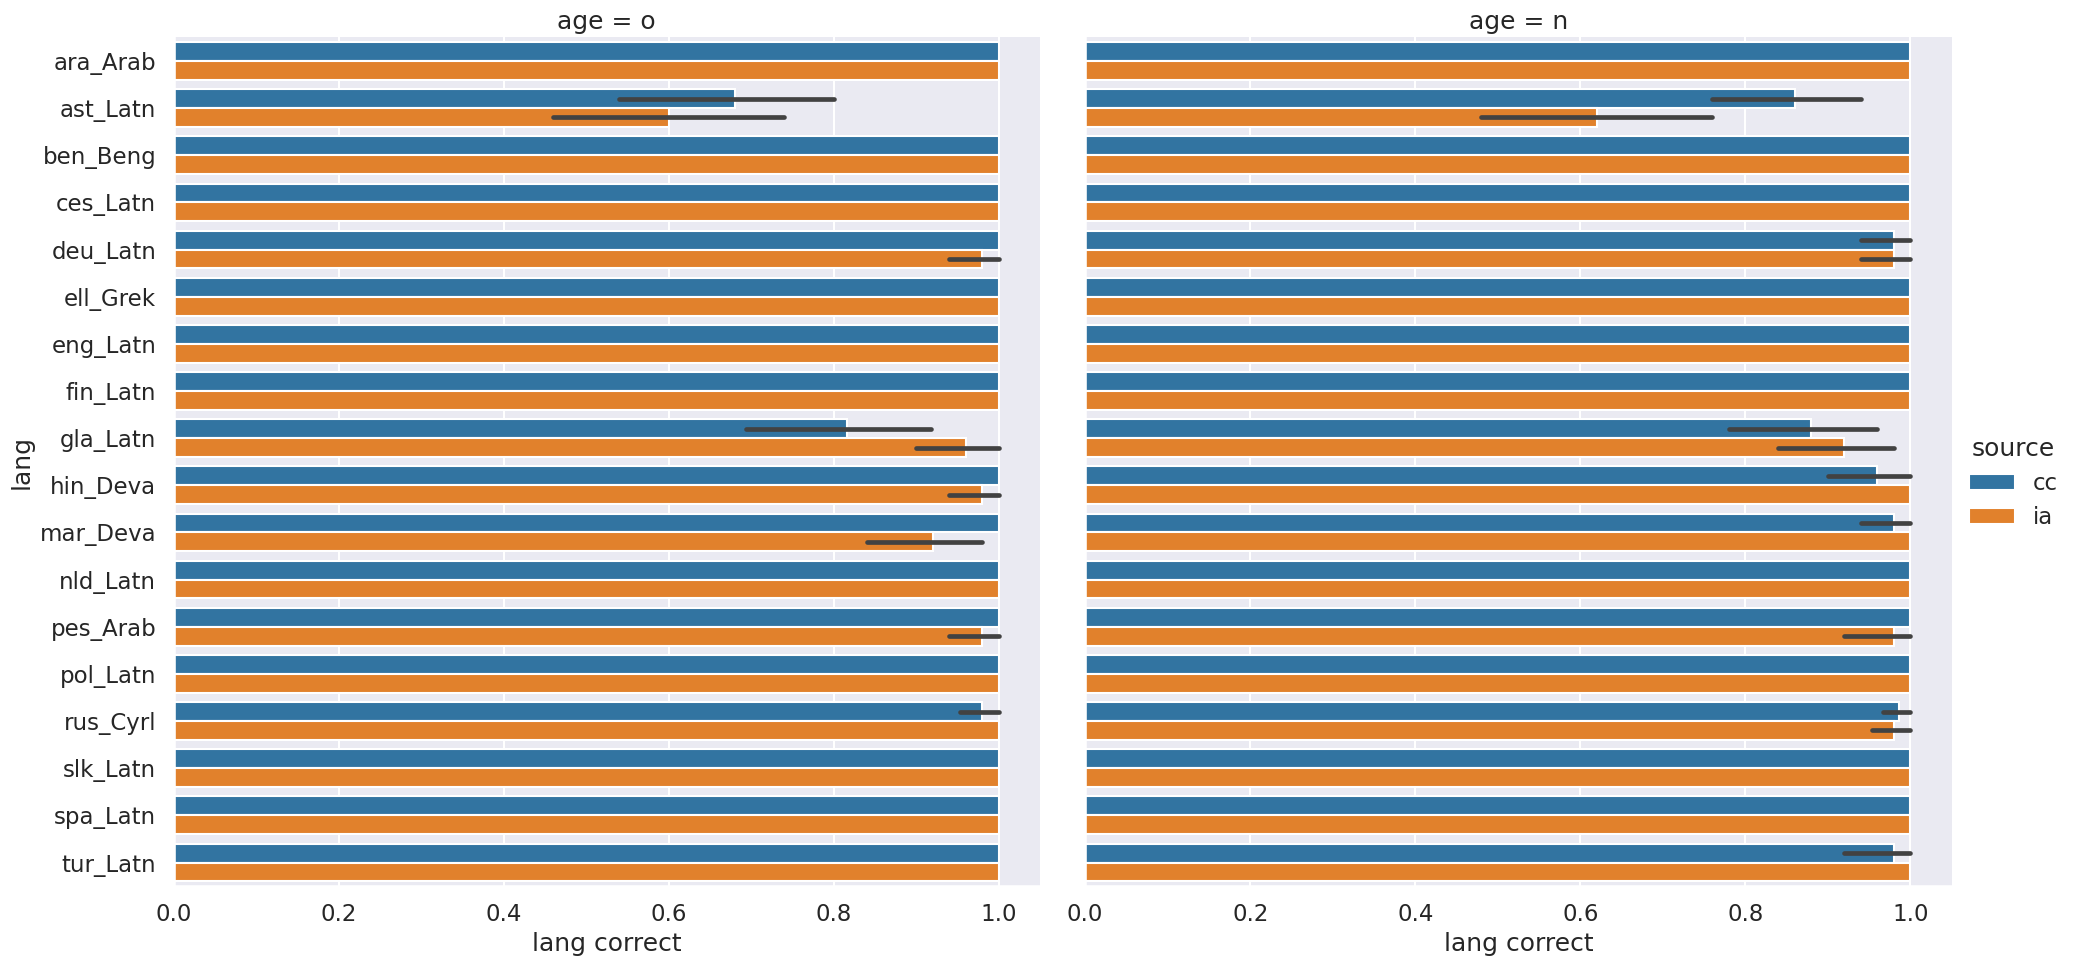

In [17]:
g = sns.catplot(data=df, y='lang', x='lang correct', hue='source',col='age',
                kind='bar', errorbar=('ci',95), height=10)

/home/nikolare/anaconda3/envs/jupyterai/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


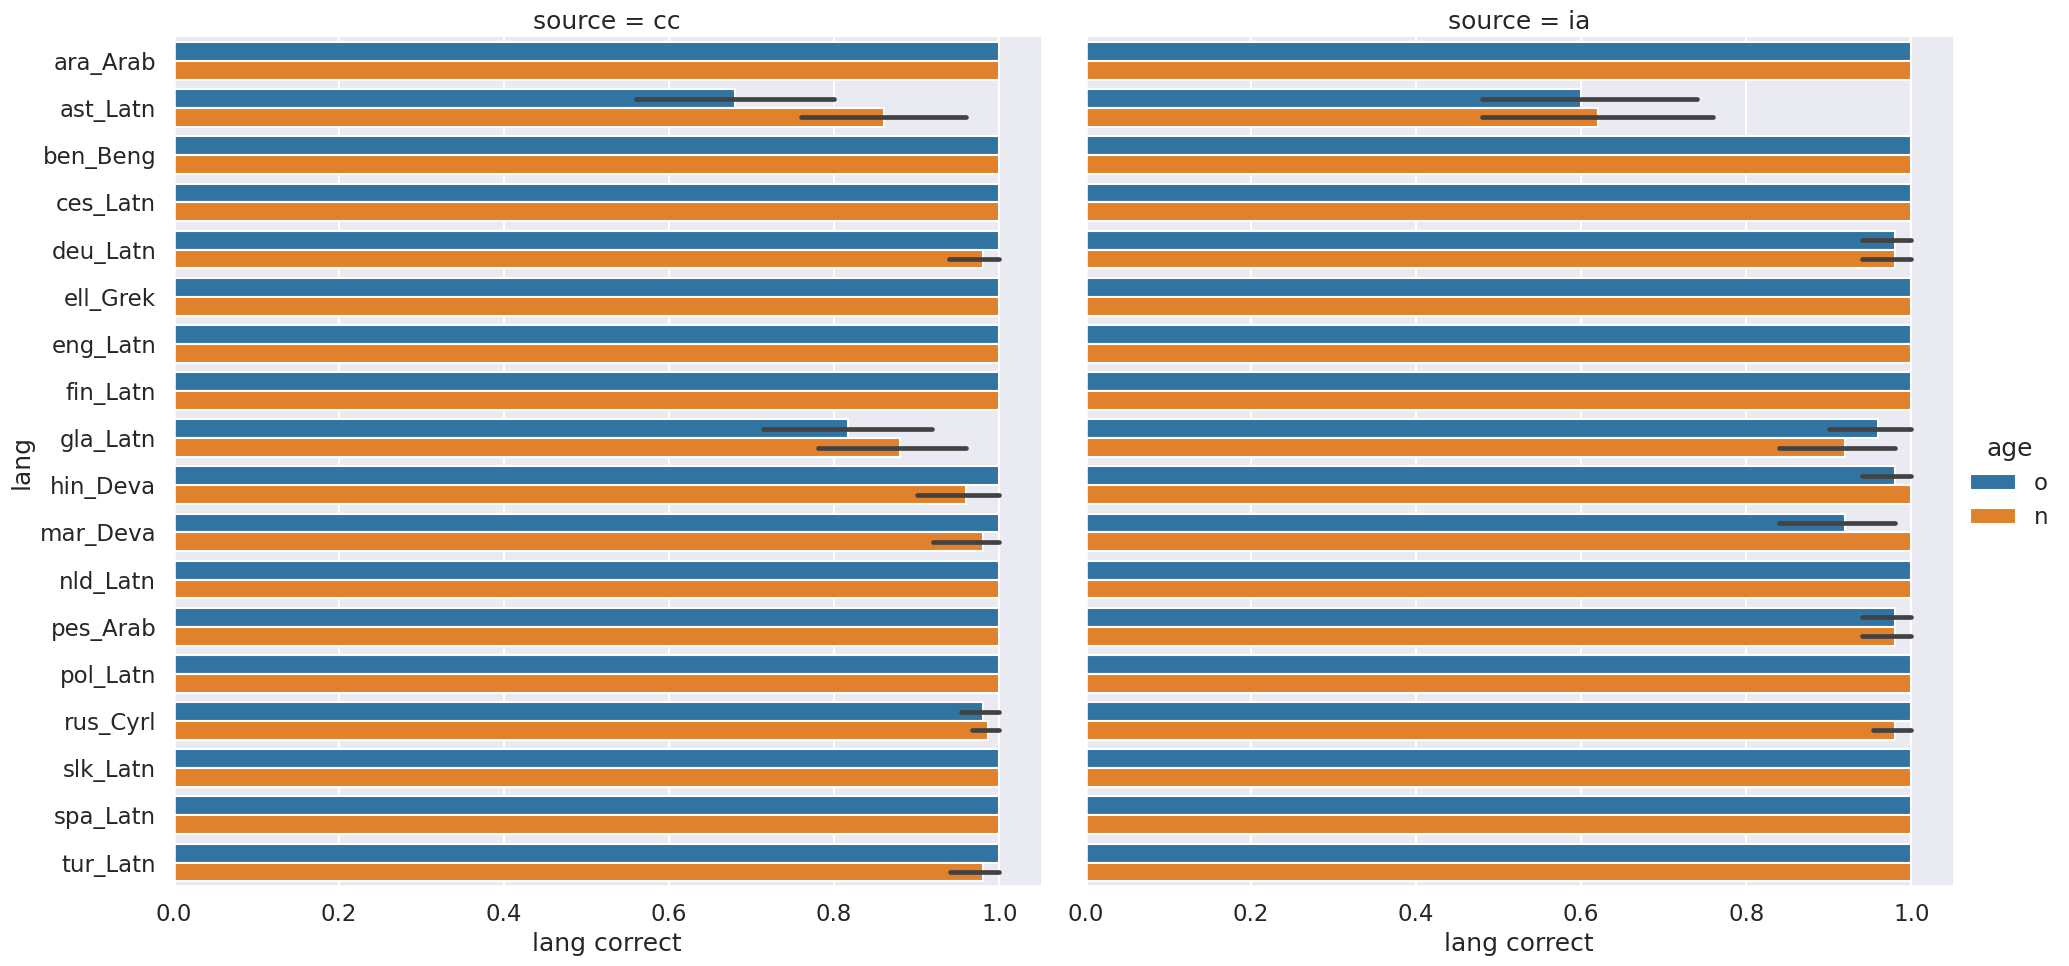

In [18]:
g = sns.catplot(data=df, y='lang', x='lang correct', col='source',hue='age',
                kind='bar', errorbar=('ci',95), height=10)

/home/nikolare/anaconda3/envs/jupyterai/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


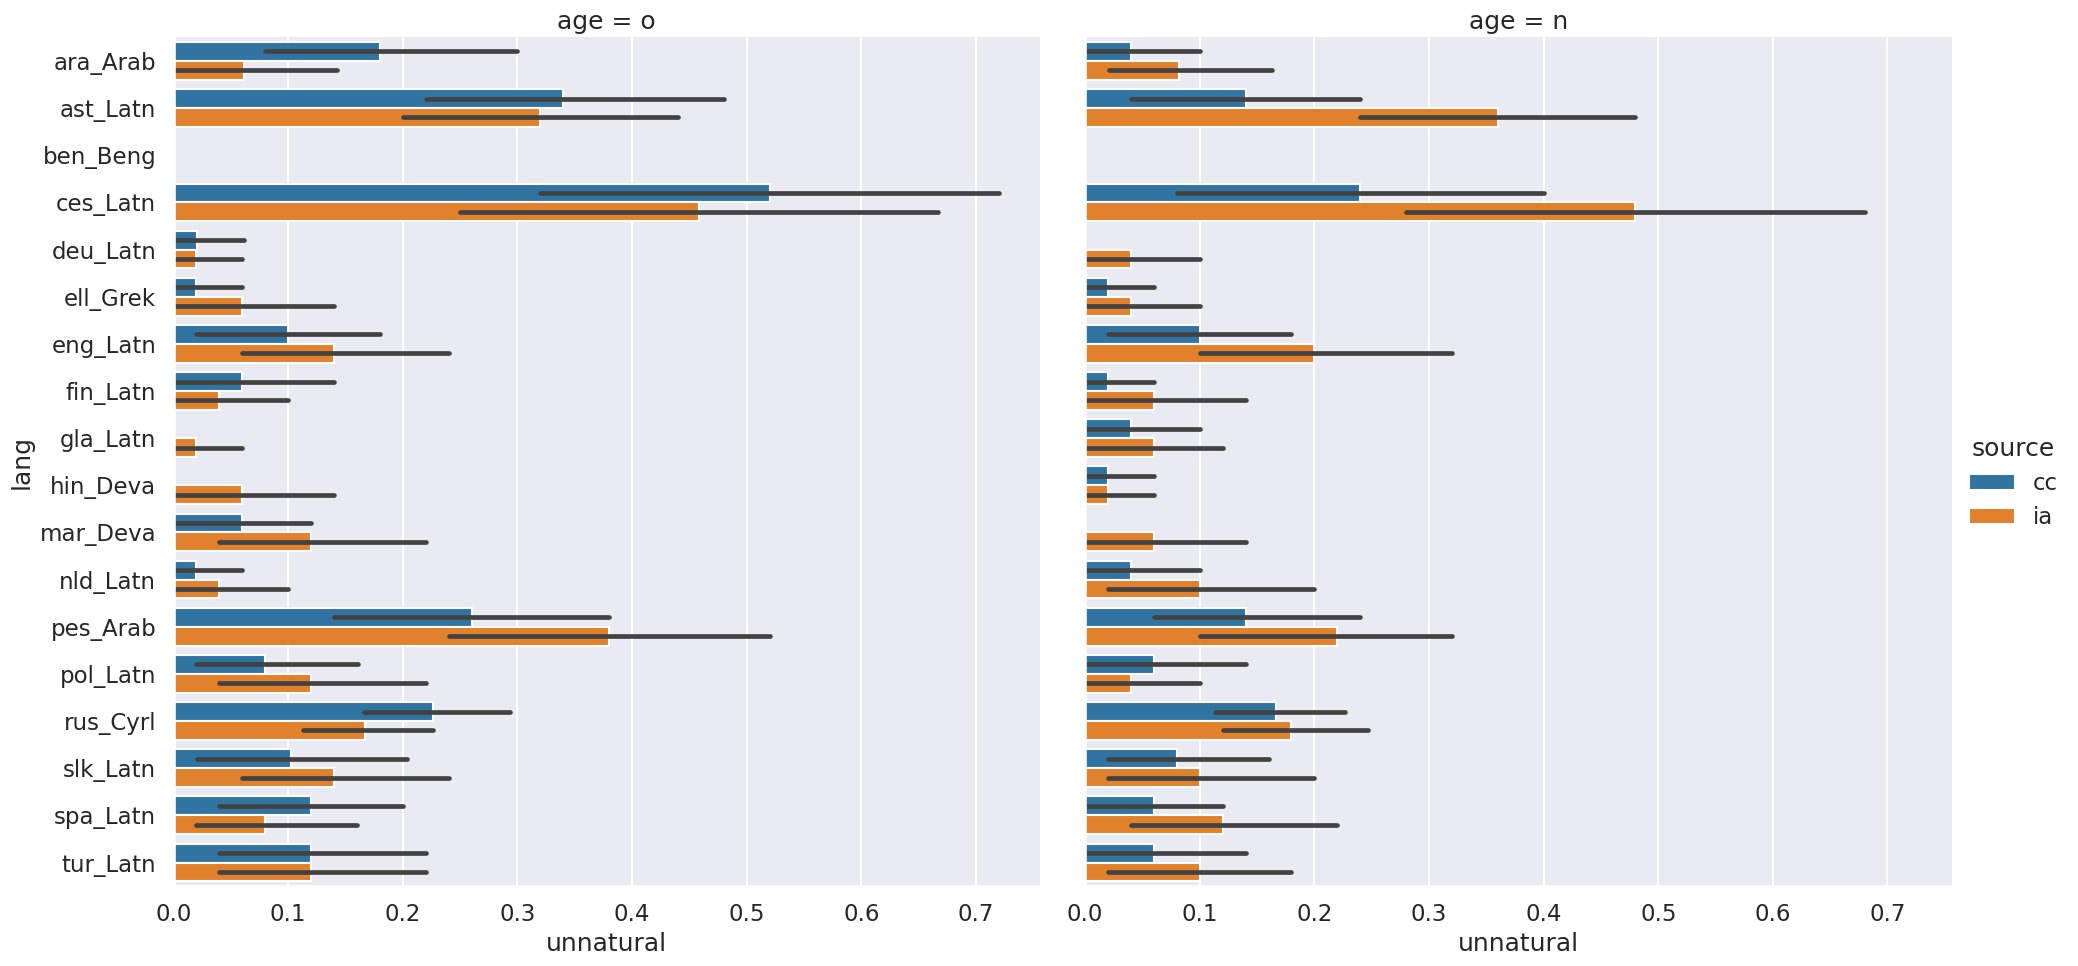

In [19]:
g = sns.catplot(data=df, y='lang', x='unnatural', hue='source',col='age',
                kind='bar', errorbar=('ci',95), height=10)

In the "new" group, IA seems to contain more unnatural texts than CC (stat. sign.?)

/home/nikolare/anaconda3/envs/jupyterai/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


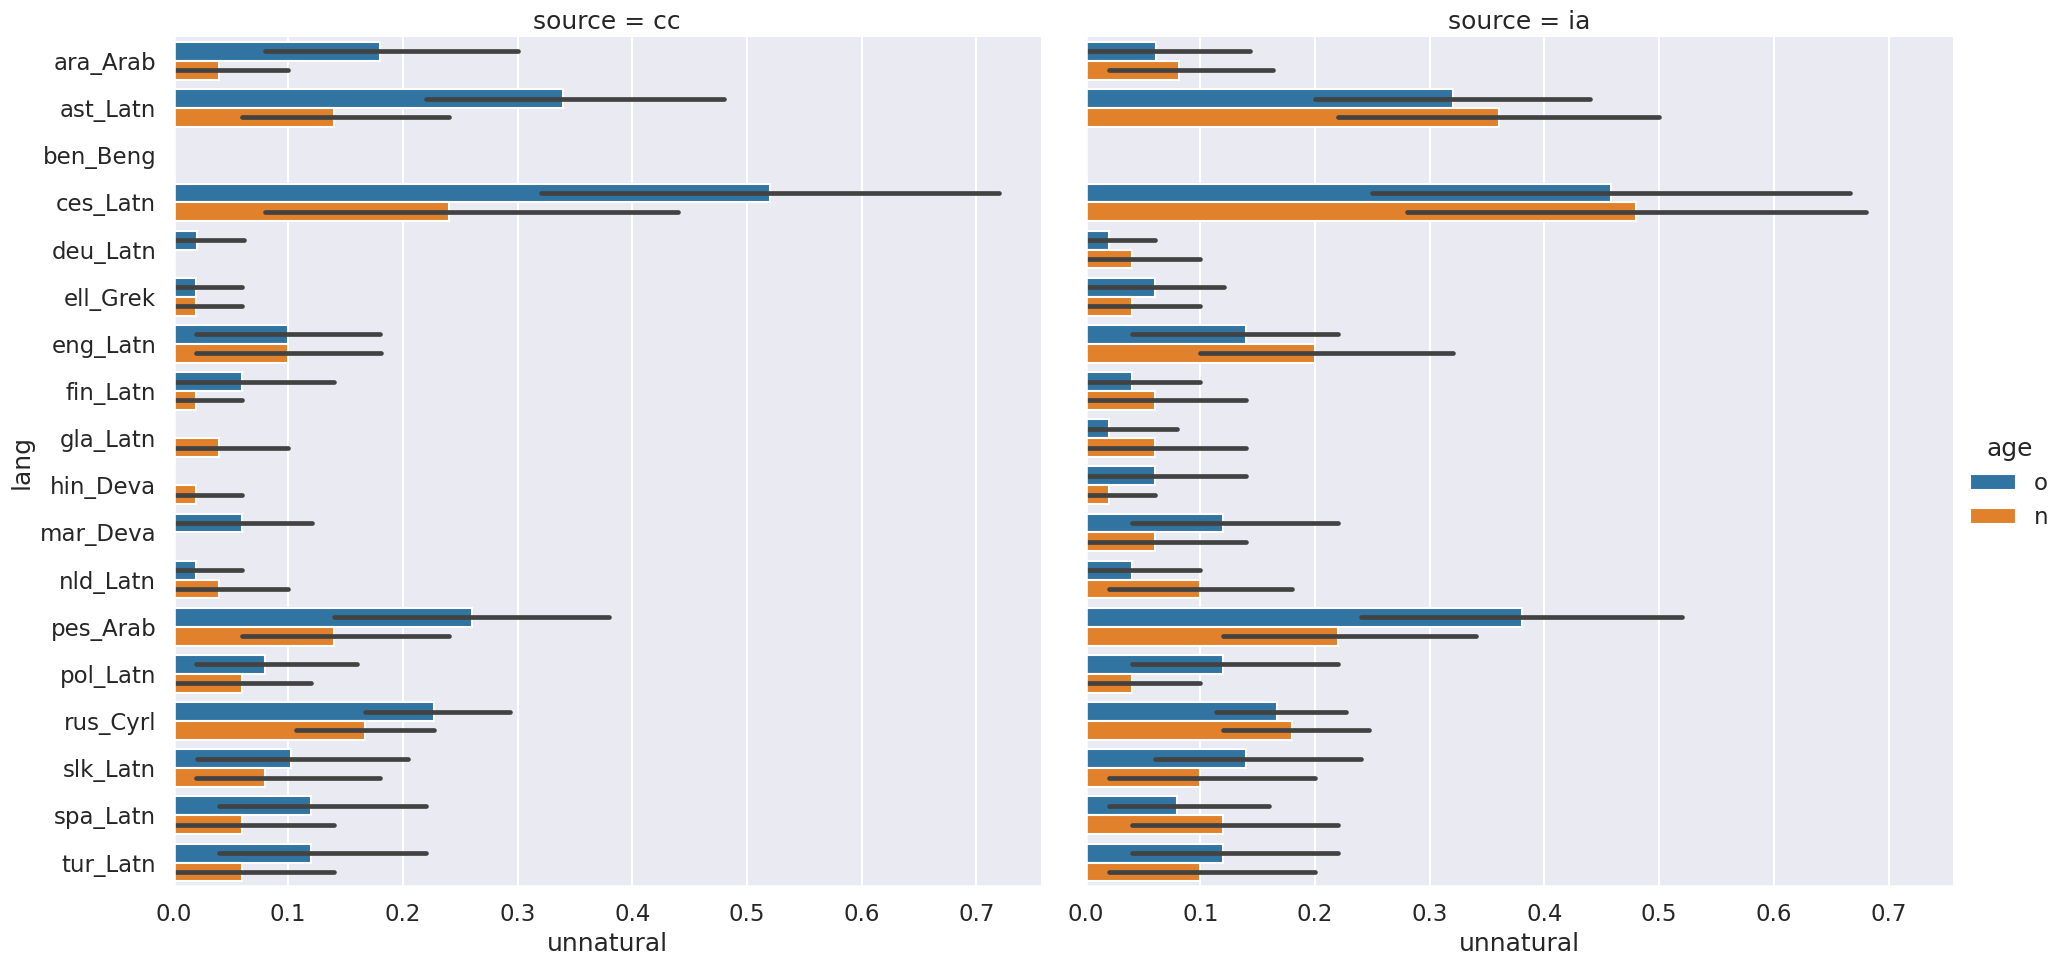

In [20]:
g = sns.catplot(data=df, y='lang', x='unnatural', hue='age',col='source',
                kind='bar', errorbar=('ci',95), height=10)

New CC seems to contain less unnatural texts compared to the old CC for most languages, though the difference is not stat. significant for each language separately.

/home/nikolare/anaconda3/envs/jupyterai/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


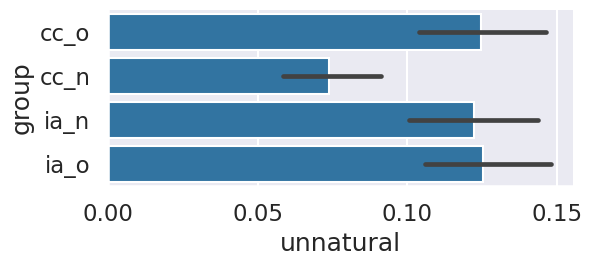

In [21]:
g = sns.catplot(data=df, x='unnatural',y='group',
                kind='bar', errorbar=('ci',95), height=3, aspect=2.0)

New CC seems to contain less unnatural texts compared to the old CC and both old and new IA (notice the plot is not re-weighted according to the language proportions)!

# Where texts from different languages mostly come from?

In [136]:
def load_crawl_sizes():
    wdf = pd.concat([pd.read_csv(f'../warc2text-runner/two/{dc}/crawls.stat', sep='\t', header=None) 
                     for dc in ('nirdl','cesnet')], ignore_index=True)
    wdf[2] = wdf[2].str.split('/').str[-1]
    wdf[1] = wdf[1].str.replace('G','').str.replace('T','000').astype(int)
    wdf = wdf.groupby(2)[1].max()  # 2 CC crawls have both full and 1% sample versions, take the full size 
    wdf = wdf.reset_index(name='GB').rename(columns={2:'crawl'})
    return wdf

In [137]:
def crawl2collection(cdf):
    cdf = cdf.str.replace('CC-MAIN-20(?P<y>\d{2})-.*','cc\g<y>', regex=True)
    cdf = cdf.str.replace('_partial','').str.replace('(?P<t>[^0-9])_?0+','\g<t>', regex=True)
    return cdf

In [138]:
wdf = load_crawl_sizes()
wdf['collection'] = crawl2collection(wdf.crawl)
wdf['group'] = wdf.collection.apply(lambda c: coll2group[c])
group_sizes = wdf.groupby('group')['GB'].sum()
print('', group_sizes.sum())
wdf = group_sizes/group_sizes.sum()
wdf

 4448547


group
cc_m             0.014419
cc_n             0.059503
cc_o             0.022466
cc_r             0.080646
ia_archivebot    0.060919
ia_m             0.181408
ia_n             0.316733
ia_o             0.242776
ia_survey        0.021130
Name: GB, dtype: float64

Among raw crawls used for the 2nd release:
* ia_n crawls (wide16 + wide17) is 32% 
* cc_n, cc_r are 6-8%
* ArchiveBot is 6%.

In [139]:
mdfs = []

for stage in ('html_stage2','cleaned'):
    mdf = pd.read_csv(f'../warc2text-runner/stats/release2.0_{stage}_stats_mr/stats.tsv', 
                      sep='\t', header=None, names='index segments wcwords chars docs'.split())
    mdf['stage'] = stage
    mdfs.append(mdf)
mdf = pd.concat(mdfs, ignore_index=True)
mdf.head()

index  segments    wcwords      chars     docs  \
0  CC-MAIN-2013-20_partial,ace_Arab     350.0     1376.0     8027.0      7.0   
1  CC-MAIN-2013-20_partial,ace_Latn   50668.0   161737.0  1106109.0   2701.0   
2  CC-MAIN-2013-20_partial,afr_Latn  222636.0  1421348.0  8131807.0  13283.0   
3  CC-MAIN-2013-20_partial,als_Latn   52410.0   801974.0  4770640.0   2853.0   
4  CC-MAIN-2013-20_partial,amh_Ethi  132049.0   951765.0  6593191.0  13125.0   

         stage  
0  html_stage2  
1  html_stage2  
2  html_stage2  
3  html_stage2  
4  html_stage2

In [140]:
# unpack 'index' into collection/crawl and lang
mdf[['collection','lang']] = mdf['index'].str.split(',', expand=True)
mdf.drop(columns='index', inplace=True)
mdf.collection = crawl2collection(mdf.collection)  # convert crawl to collection for html_stage2
mdf.collection.value_counts()

collection
cc18          2512
cc17          2508
cc19          2508
cc15          2107
cc20          1929
cc21          1927
cc16          1912
cc14          1723
cc22          1352
cc23           955
cc13           556
wide16         385
wide5          384
wide11         384
wide12         384
wide15         384
wide17         384
survey3        383
wide10         380
archivebot     379
wide6          377
Name: count, dtype: int64

In [141]:
mdf['group'] = mdf.collection.apply(lambda c: coll2group[c])  # annotate collection groups
assert mdf.group.isnull().sum()==0
mdf.head()

segments    wcwords      chars     docs        stage collection      lang  \
0     350.0     1376.0     8027.0      7.0  html_stage2       cc13  ace_Arab   
1   50668.0   161737.0  1106109.0   2701.0  html_stage2       cc13  ace_Latn   
2  222636.0  1421348.0  8131807.0  13283.0  html_stage2       cc13  afr_Latn   
3   52410.0   801974.0  4770640.0   2853.0  html_stage2       cc13  als_Latn   
4  132049.0   951765.0  6593191.0  13125.0  html_stage2       cc13  amh_Ethi   

  group  
0  cc_o  
1  cc_o  
2  cc_o  
3  cc_o  
4  cc_o

In [142]:
# Proportions of extracted texts per group, for each stage separately
gdf = mdf.groupby(['stage','group']).sum(numeric_only=True)
gdf = gdf.groupby('stage').transform(lambda r: r/r.sum() if is_numeric_dtype(r) else r)
gdf

segments   wcwords     chars      docs
stage       group                                                
cleaned     cc_m           0.033933  0.041084  0.036900  0.032413
            cc_n           0.224541  0.255944  0.247893  0.249451
            cc_o           0.033228  0.039485  0.035337  0.031892
            cc_r           0.252270  0.304379  0.294942  0.279958
            ia_archivebot  0.006959  0.007524  0.007015  0.006612
            ia_m           0.153272  0.130195  0.134158  0.138383
            ia_n           0.130043  0.091667  0.109241  0.120023
            ia_o           0.158553  0.121121  0.126081  0.133165
            ia_survey      0.007201  0.008601  0.008434  0.008102
html_stage2 cc_m           0.036269  0.050544  0.045231  0.036620
            cc_n           0.131958  0.171626  0.165089  0.125594
            cc_o           0.060108  0.087388  0.078349  0.062508
            cc_r           0.124239  0.187575  0.193901  0.124276
            ia_archivebot  0.007379  0.009888  0.009403  0.010095
            ia_m           0.175681  0.146371  0.146115  0.146704
            ia_n           0.231950  0.155994  0.166937  0.260096
            ia_o           0.228588  0.184884  0.188805  0.228017
            ia_survey      0.003828  0.005730  0.006171  0.006090

In [143]:
wdf

group
cc_m             0.014419
cc_n             0.059503
cc_o             0.022466
cc_r             0.080646
ia_archivebot    0.060919
ia_m             0.181408
ia_n             0.316733
ia_o             0.242776
ia_survey        0.021130
Name: GB, dtype: float64

In [144]:
wdf1 = wdf.reset_index().melt(id_vars='group', value_vars='GB', value_name='prop', var_name='quantity')
wdf1['stage'] = 'crawls'
gdf1 = gdf.reset_index().melt(id_vars=['stage','group'],value_vars=['docs','chars'], value_name='prop', var_name='quantity')

pdf = pd.concat([wdf1,gdf1], ignore_index=True)

/home/nikolare/anaconda3/envs/jupyterai/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


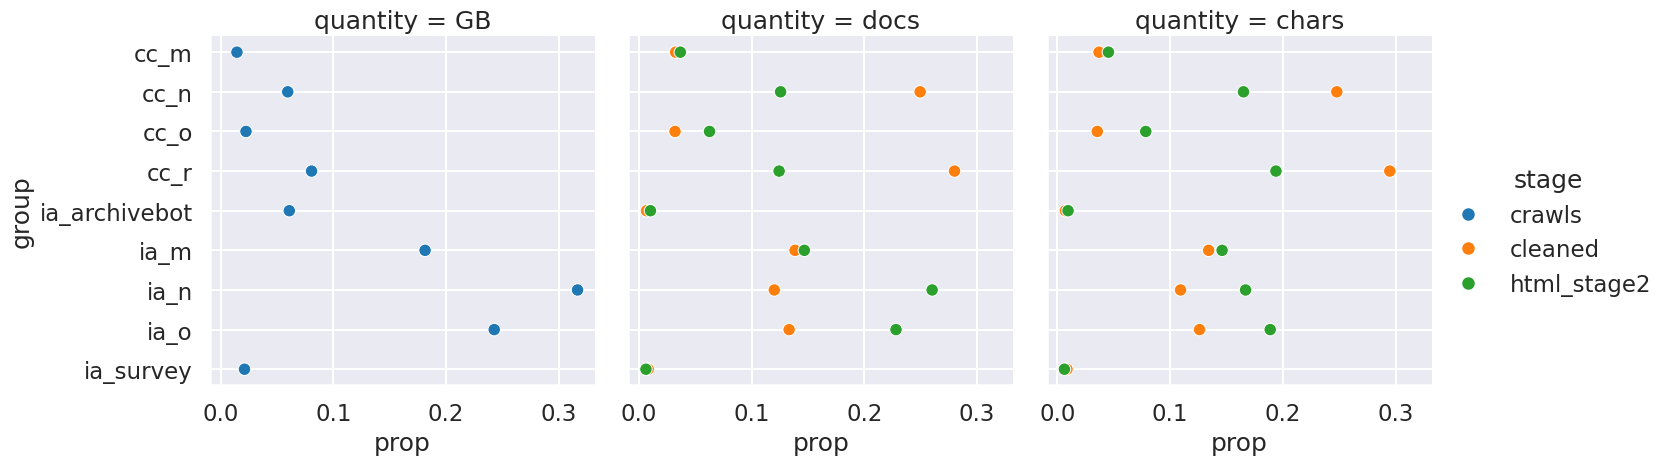

In [145]:
g = sns.relplot(data=pdf, y='group', x='prop', hue='stage', col='quantity')
g.savefig('plots/group-contribs.pdf')

ia_n is 32% of raw crawls, but contributes to 11-12% of texts (both in docs and chars) in the cleaned version. Similar disproportion for other IA crawls.

cc_r is 8% of raw crawls, but contributes to 28-30% of texts (both in docs and chars) in the cleaned version. Similarly for cc_n. 

The proportions of texts extracted from cc_r, cc_n crawls significantly increase between html_stage2 and cleaned versions, for IA they decrease (ia_n, ia_o) or remain the same (compare orange and greed dots).

In [146]:
mdf = mdf.groupby(['stage','group','lang']).sum(numeric_only=True)
mdf.head()

segments      wcwords         chars      docs
stage   group lang                                                     
cleaned cc_m  ace_Latn     12657.0    1149733.0  7.131853e+06    1623.0
              afr_Latn    873972.0   24332610.0  1.485206e+08   28116.0
              als_Latn   2464429.0   72627844.0  4.320860e+08   68121.0
              amh_Ethi     60105.0    1685373.0  8.847786e+06    1976.0
              ara_Arab  55800070.0  953058640.0  5.432094e+09  848932.0

In [147]:
langs_sorted = mdf.groupby('lang')['chars'].agg('sum').sort_values().index

pdf = mdf.groupby(['stage','lang']).transform(lambda r: r/r.sum()).reset_index()

pdf = pdf.set_index('lang').loc[langs_sorted].reset_index()

pdf['style'] = pdf.group.apply(lambda s: s if s in ('ia_archivebot','ia_survey') else s.split('_')[0])

/home/nikolare/anaconda3/envs/jupyterai/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


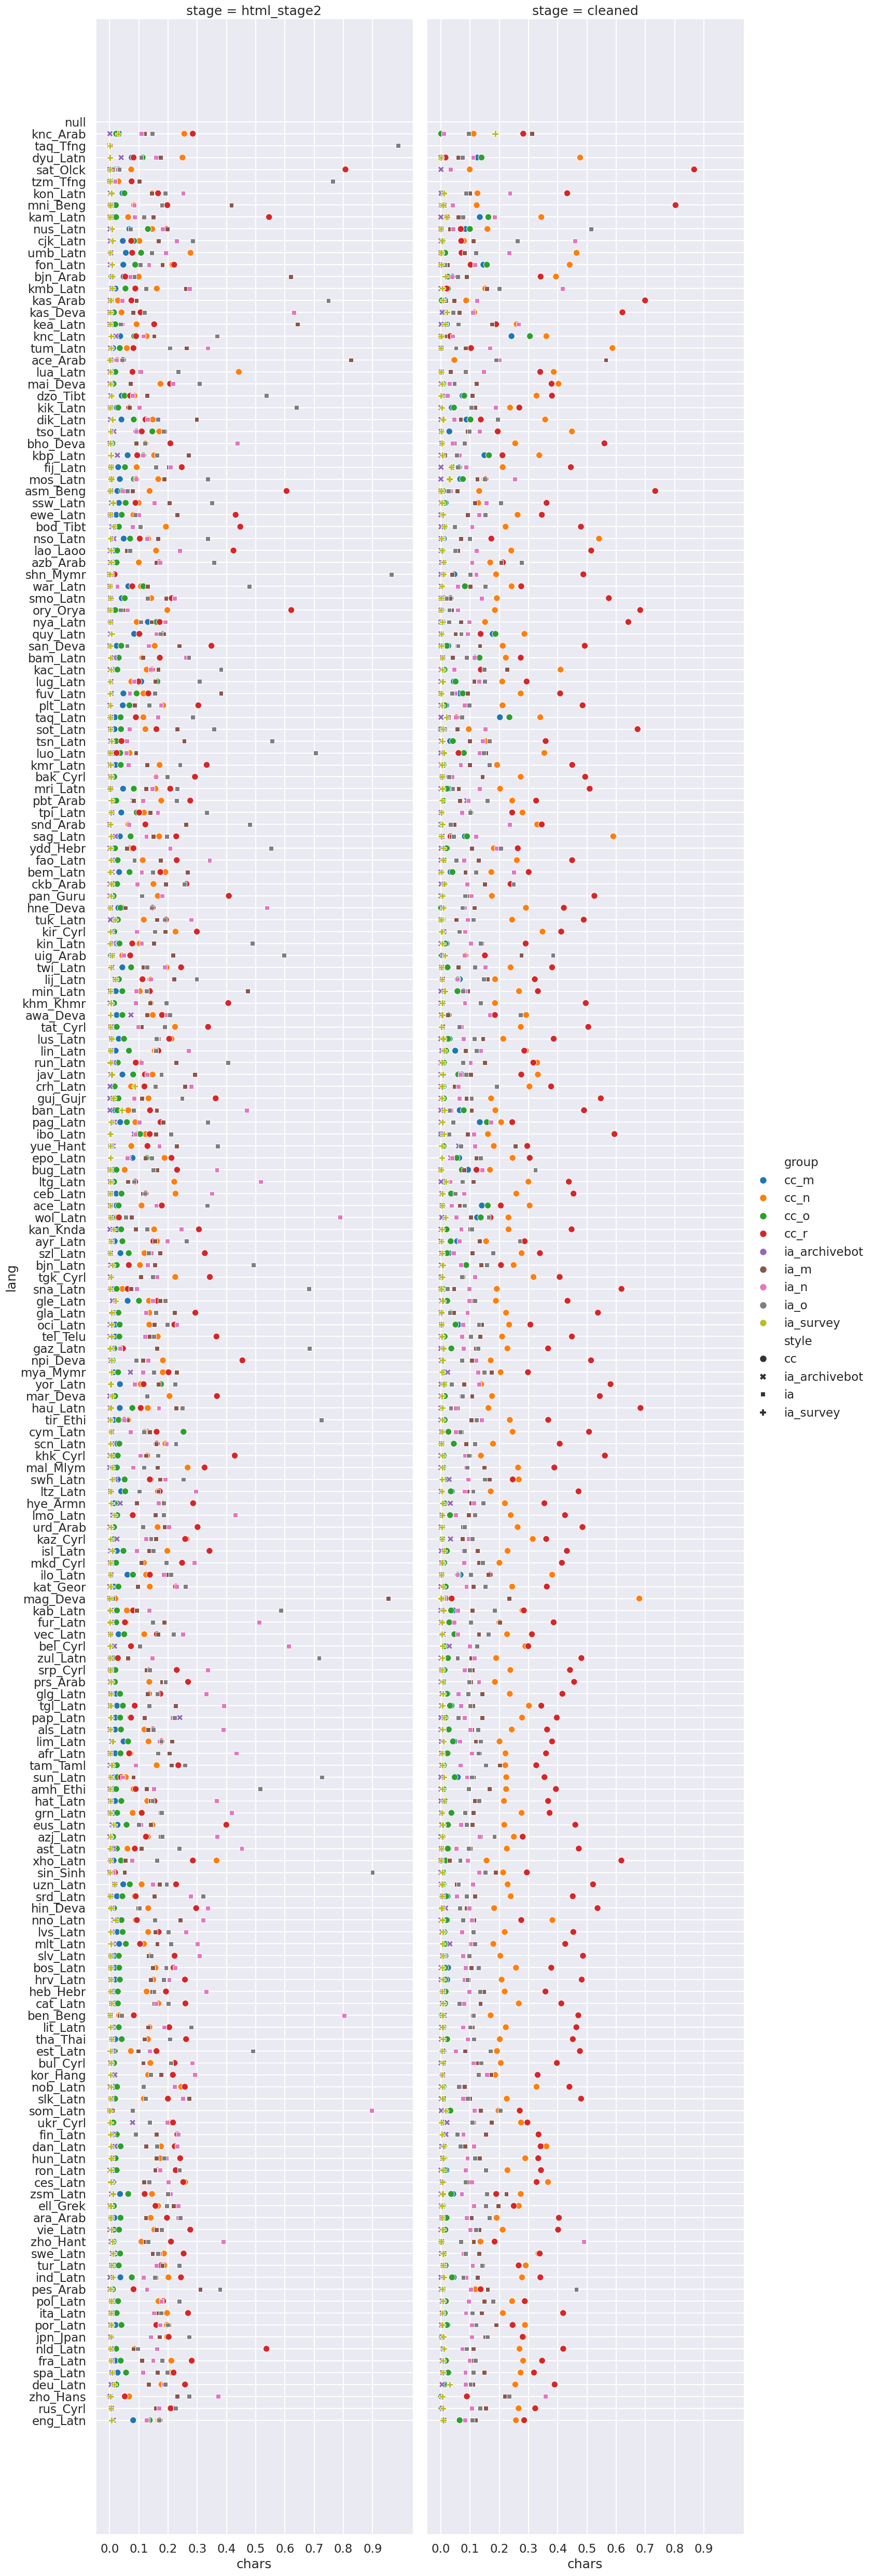

In [149]:
# proportions of texts (characters) coming from different crawl groups for each language
g = sns.relplot(data=pdf, y='lang', x='chars', hue='group', kind='scatter', 
                style='style', col='stage',
           height=50, aspect=0.15)
g.set(xticks=[0.1*i for i in range(10)])
g.savefig('plots/group-contribs-perlang-chars.pdf')

/home/nikolare/anaconda3/envs/jupyterai/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


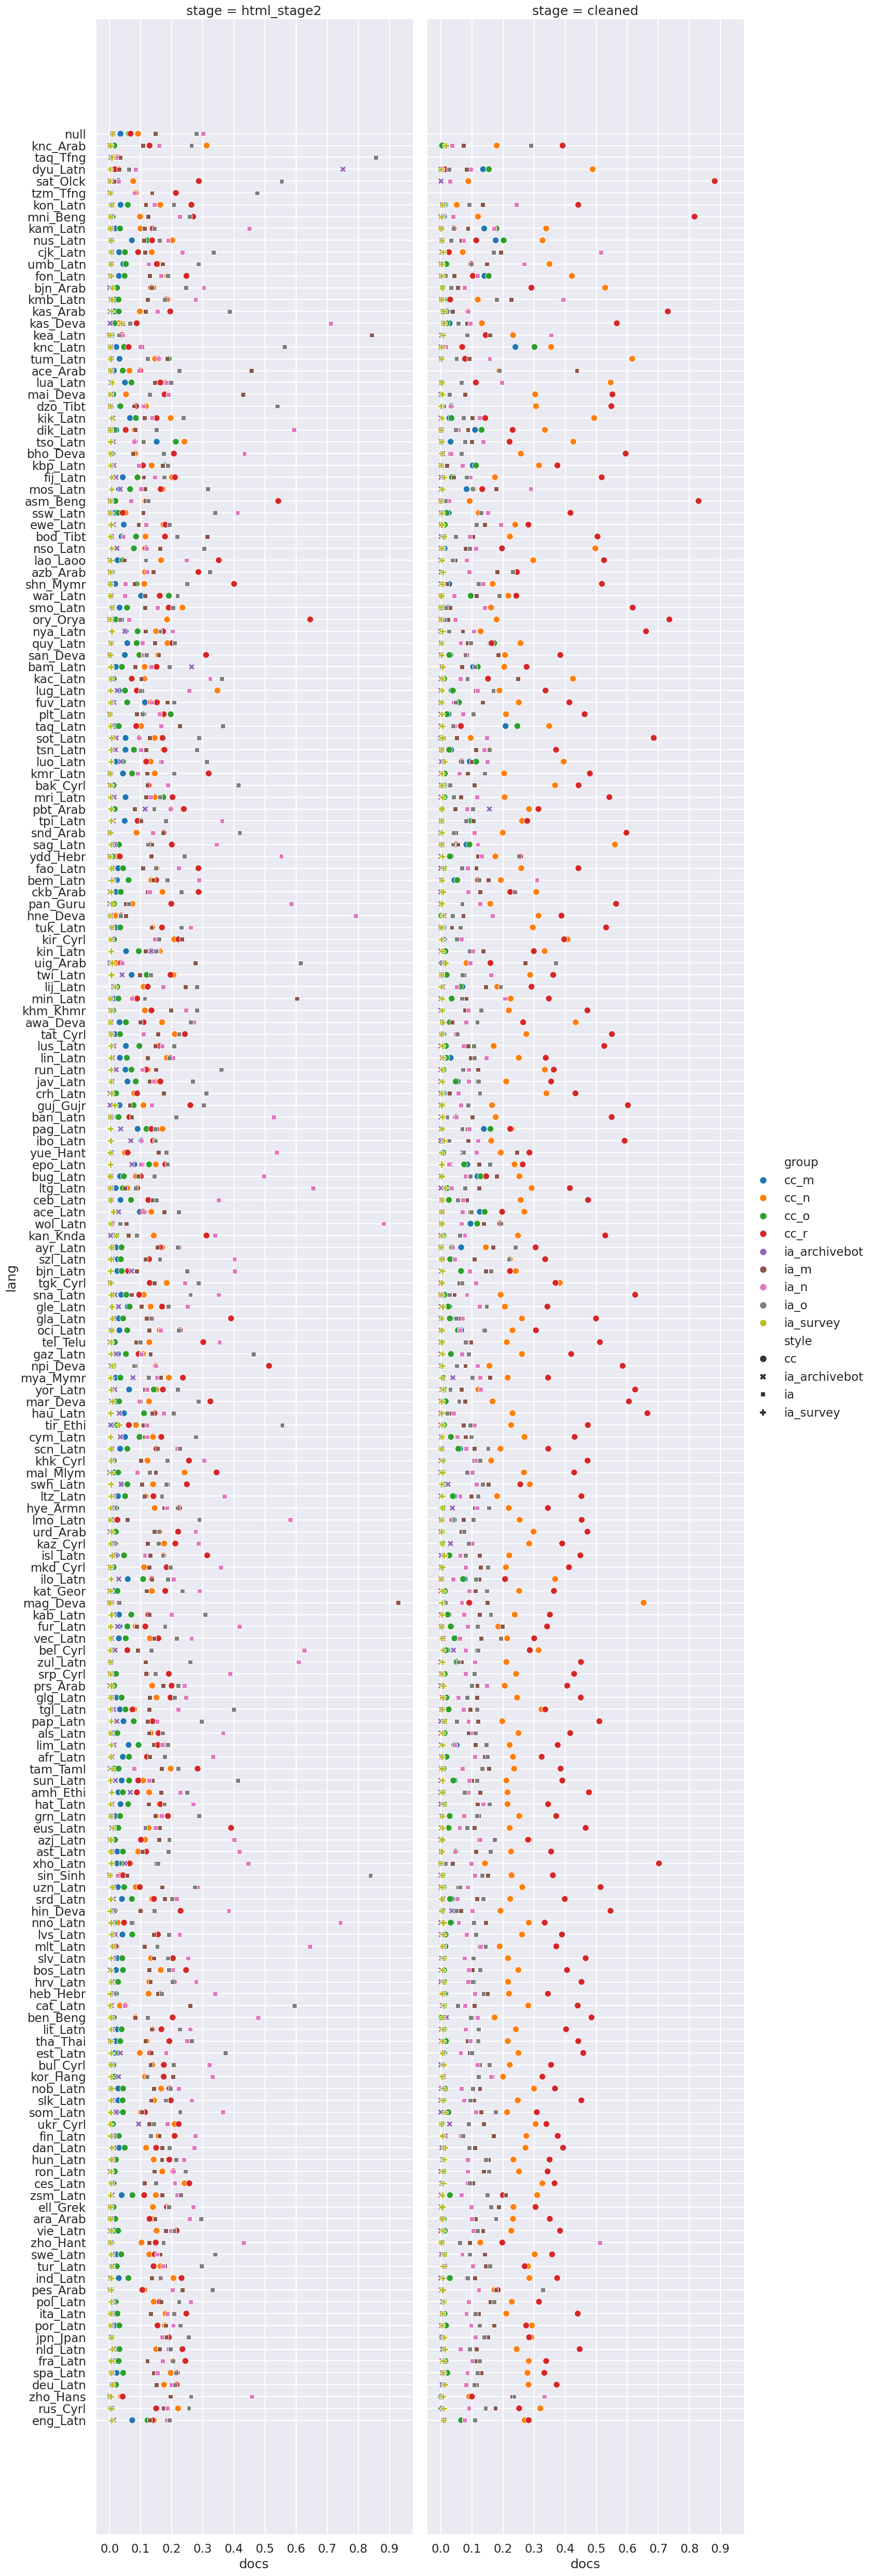

In [150]:
# proportions of documents coming from different crawl groups for each language
g = sns.relplot(data=pdf, y='lang', x='docs', hue='group', kind='scatter', 
                style='style', col='stage',
           height=50, aspect=0.15)
g.set(xticks=[0.1*i for i in range(10)])
g.savefig('plots/group-contribs-perlang-docs.pdf')

/home/nikolare/anaconda3/envs/jupyterai/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


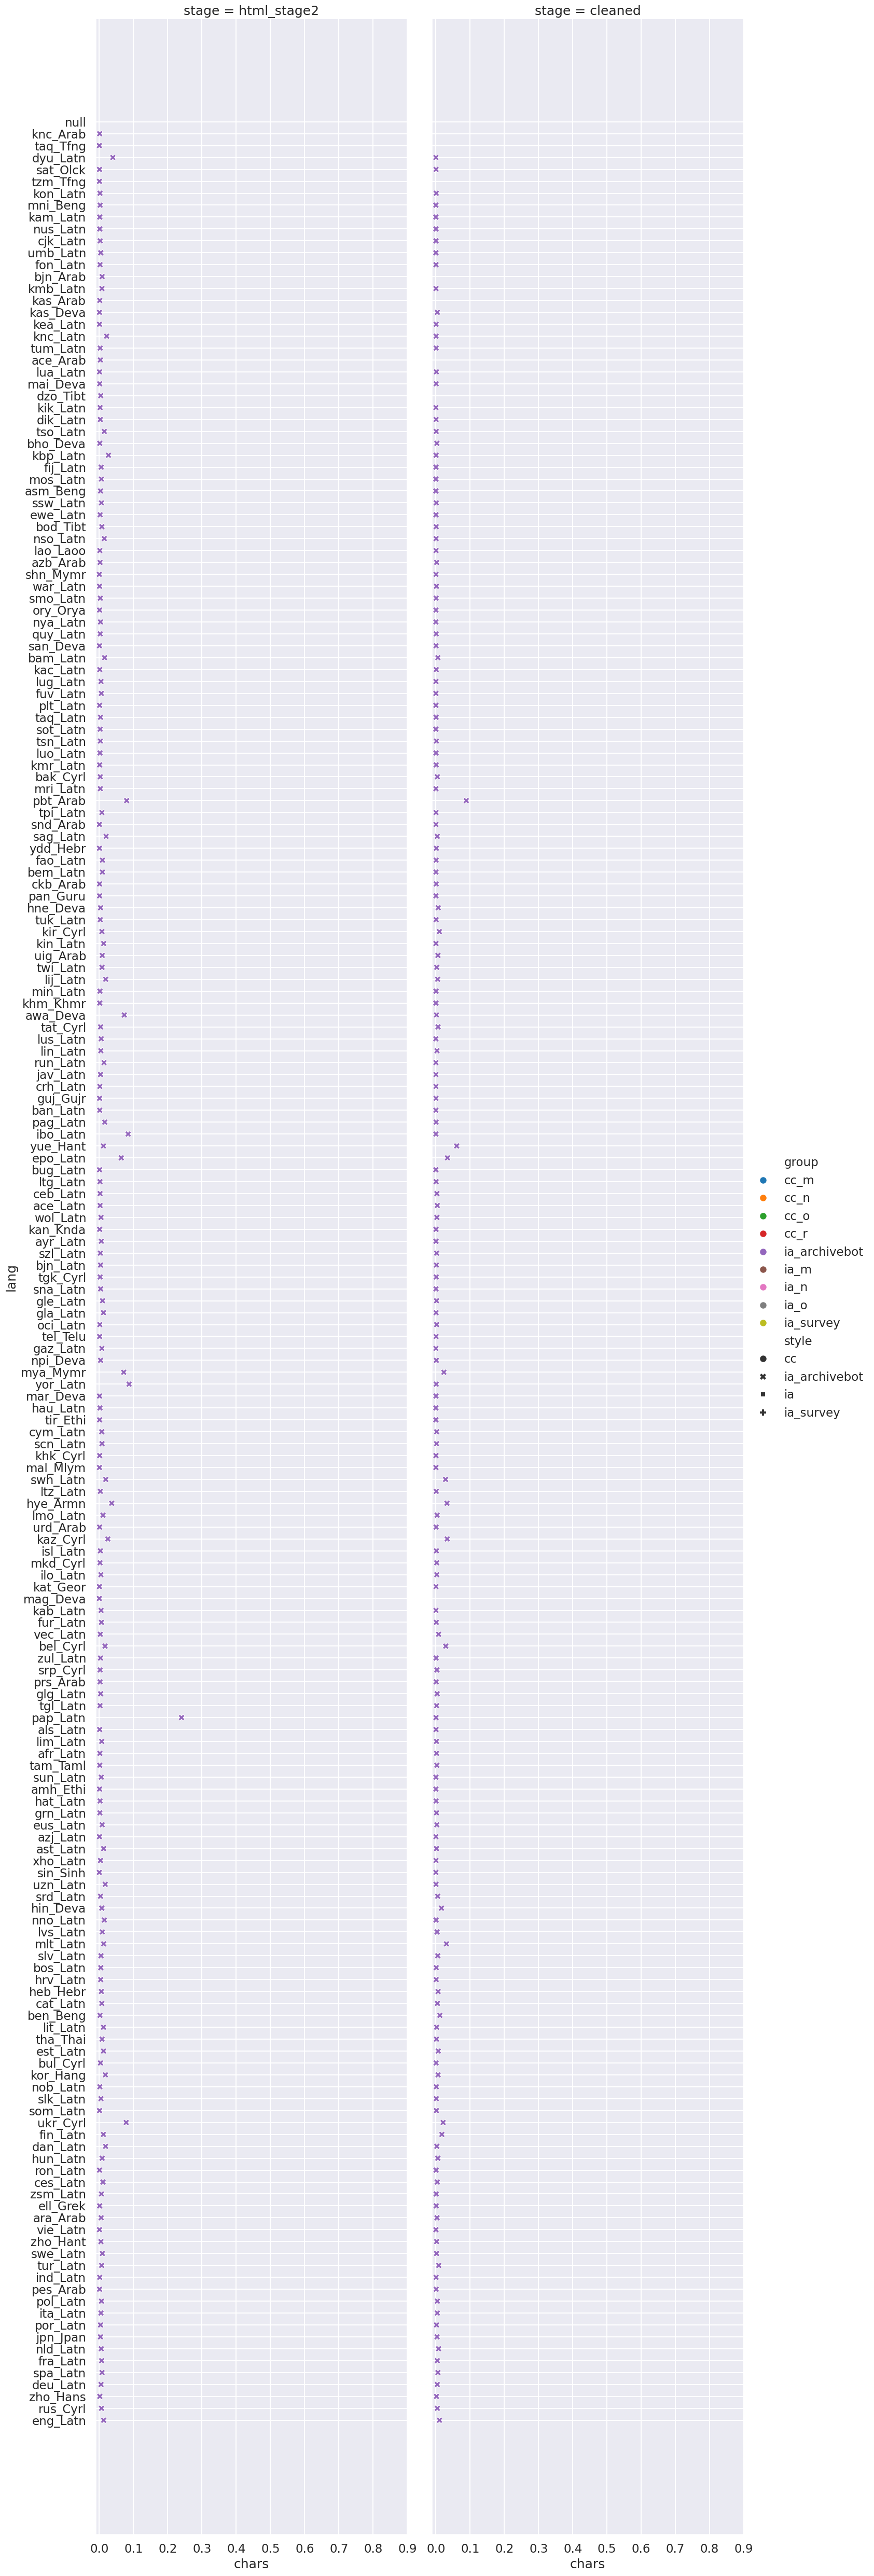

In [151]:
# which languages a large proportion of characters comes from archive bot?
g = sns.relplot(data=pdf[pdf['group'].str.startswith('ia_arch')], y='lang', x='chars', hue='group', kind='scatter', 
                style='style', hue_order=pdf['group'].unique(), style_order=pdf['style'].unique(), col='stage',
           height=50, aspect=0.15)
g.set(xticks=[0.1*i for i in range(10)])

We have 7% of ArchiveBot, can increase by 15x. This will give 
+10% * (15-1) = +140% of pbt_Arab, 
+3-5% * (15-1) = +40-70% for ~10 other languages,
much less for most languages.

/home/nikolare/anaconda3/envs/jupyterai/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


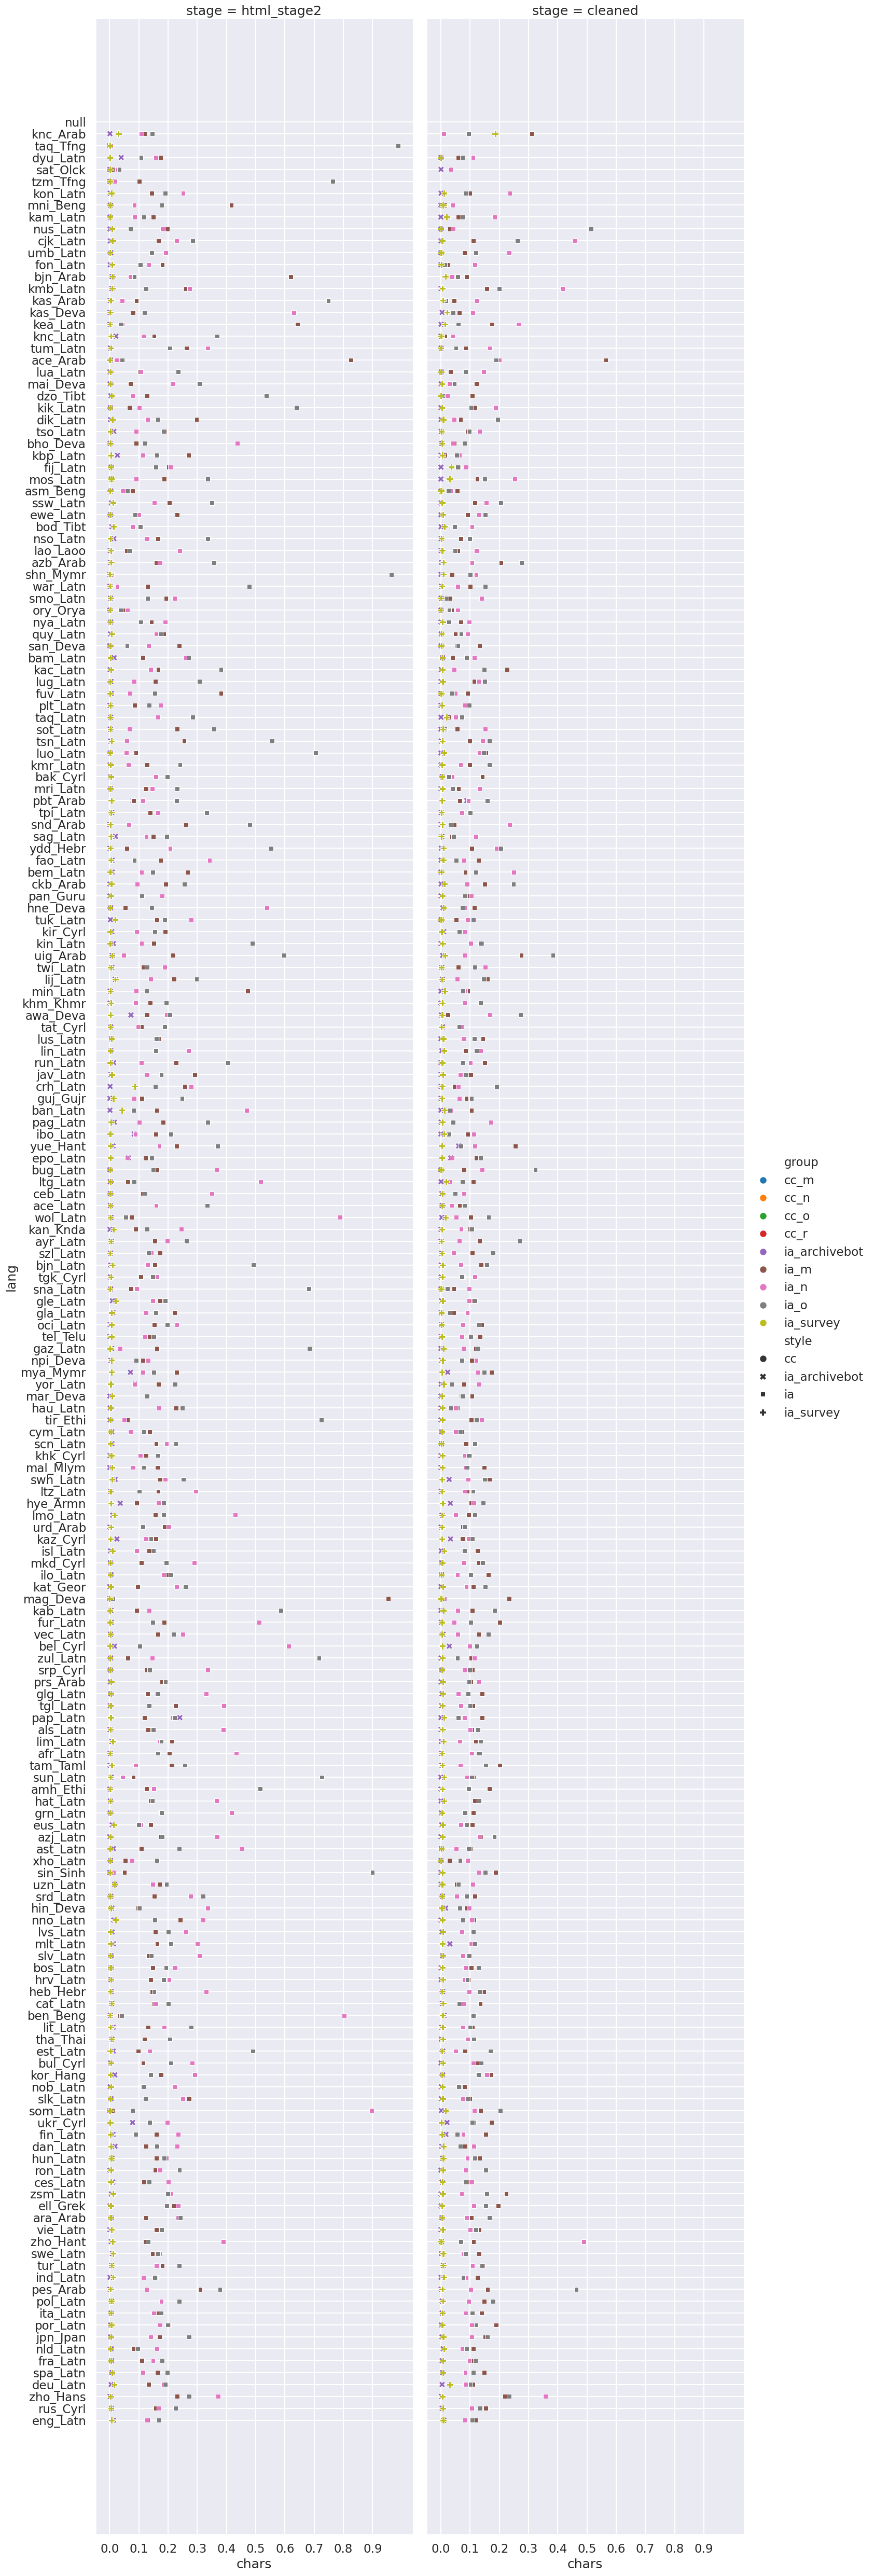

In [152]:
# which languages a large proportion of characters comes from IA crawls?
g = sns.relplot(data=pdf[pdf['group'].str.startswith('ia_')], y='lang', x='chars', hue='group', kind='scatter', 
                style='style', hue_order=pdf['group'].unique(), style_order=pdf['style'].unique(), col='stage',
           height=50, aspect=0.15)
g.set(xticks=[0.1*i for i in range(10)])
g.savefig('[group-contribs-perlang-chars-iaonly.pdf')

# Yields

In [38]:
group_sizes

group
cc_m               64144
cc_n              264703
cc_o               99941
cc_r              358759
ia_archivebot     271000
ia_m              807000
ia_n             1409000
ia_o             1080000
ia_survey          94000
Name: GB, dtype: int64

In [112]:
gdf = mdf.reset_index().groupby(['stage','group']).sum(numeric_only=True)
gdf

segments       wcwords         chars  \
stage       group                                                     
cleaned     cc_m           1.019011e+10  2.282441e+11  1.381445e+12   
            cc_n           6.742982e+10  1.421906e+12  9.280560e+12   
            cc_o           9.978533e+09  2.193625e+11  1.322949e+12   
            cc_r           7.575680e+10  1.690989e+12  1.104197e+13   
            ia_archivebot  2.089877e+09  4.180026e+10  2.626273e+11   
            ia_m           4.602769e+10  7.233028e+11  5.022563e+12   
            ia_n           3.905196e+10  5.092599e+11  4.089744e+12   
            ia_o           4.761364e+10  6.728910e+11  4.720193e+12   
            ia_survey      2.162595e+09  4.778321e+10  3.157517e+11   
html_stage2 cc_m           8.059934e+10  1.076941e+12  6.608505e+12   
            cc_n           2.932451e+11  3.656854e+12  2.412044e+13   
            cc_o           1.335752e+11  1.861995e+12  1.144725e+13   
            cc_r           2.760924e+11  3.996673e+12  2.833005e+13   
            ia_archivebot  1.639818e+10  2.106876e+11  1.373769e+12   
            ia_m           3.904105e+11  3.118744e+12  2.134821e+13   
            ia_n           5.154552e+11  3.323772e+12  2.439048e+13   
            ia_o           5.079840e+11  3.939335e+12  2.758546e+13   
            ia_survey      8.507346e+09  1.220928e+11  9.015846e+11   

                                   docs  
stage       group                        
cleaned     cc_m           3.422434e+08  
            cc_n           2.633933e+09  
            cc_o           3.367497e+08  
            cc_r           2.956053e+09  
            ia_archivebot  6.982054e+07  
            ia_m           1.461174e+09  
            ia_n           1.267311e+09  
            ia_o           1.406076e+09  
            ia_survey      8.554419e+07  
html_stage2 cc_m           3.888278e+09  
            cc_n           1.333527e+10  
            cc_o           6.636961e+09  
            cc_r           1.319533e+10  
            ia_archivebot  1.071835e+09  
            ia_m           1.557672e+10  
            ia_n           2.761638e+10  
            ia_o           2.421038e+10  
            ia_survey      6.466359e+08

In [113]:
pdf = gdf.groupby('stage').transform(lambda r: r/group_sizes)
pdf

segments       wcwords         chars  \
stage       group                                                     
cleaned     cc_m           1.588630e+05  3.558308e+06  2.153663e+07   
            cc_n           2.547376e+05  5.371704e+06  3.506027e+07   
            cc_o           9.984424e+04  2.194920e+06  1.323730e+07   
            cc_r           2.111635e+05  4.713440e+06  3.077825e+07   
            ia_archivebot  7.711724e+03  1.542445e+05  9.691044e+05   
            ia_m           5.703555e+04  8.962860e+05  6.223746e+06   
            ia_n           2.771608e+04  3.614336e+05  2.902586e+06   
            ia_o           4.408670e+04  6.230472e+05  4.370549e+06   
            ia_survey      2.300633e+04  5.083320e+05  3.359061e+06   
html_stage2 cc_m           1.256537e+06  1.678943e+07  1.030261e+08   
            cc_n           1.107827e+06  1.381493e+07  9.112266e+07   
            cc_o           1.336540e+06  1.863094e+07  1.145401e+08   
            cc_r           7.695761e+05  1.114027e+07  7.896680e+07   
            ia_archivebot  6.050990e+04  7.774450e+05  5.069259e+06   
            ia_m           4.837800e+05  3.864614e+06  2.645379e+07   
            ia_n           3.658306e+05  2.358958e+06  1.731049e+07   
            ia_o           4.703556e+05  3.647532e+06  2.554209e+07   
            ia_survey      9.050368e+04  1.298860e+06  9.591326e+06   

                                   docs  
stage       group                        
cleaned     cc_m            5335.548485  
            cc_n            9950.523379  
            cc_o            3369.485126  
            cc_r            8239.660948  
            ia_archivebot    257.640354  
            ia_m            1810.624680  
            ia_n             899.440138  
            ia_o            1301.921999  
            ia_survey        910.044606  
html_stage2 cc_m           60617.949380  
            cc_n           50378.219117  
            cc_o           66408.791467  
            cc_r           36780.493763  
            ia_archivebot   3955.109590  
            ia_m           19302.005144  
            ia_n           19599.982983  
            ia_o           22417.014761  
            ia_survey       6879.105340

In [114]:
pdf = pdf.reset_index().melt(id_vars=['stage','group'], value_vars=['chars','docs'], 
                             var_name='quantity',value_name='yield')

/home/nikolare/anaconda3/envs/jupyterai/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'Chars/docs of extracted text per 1 GB of raw compressed crawls')

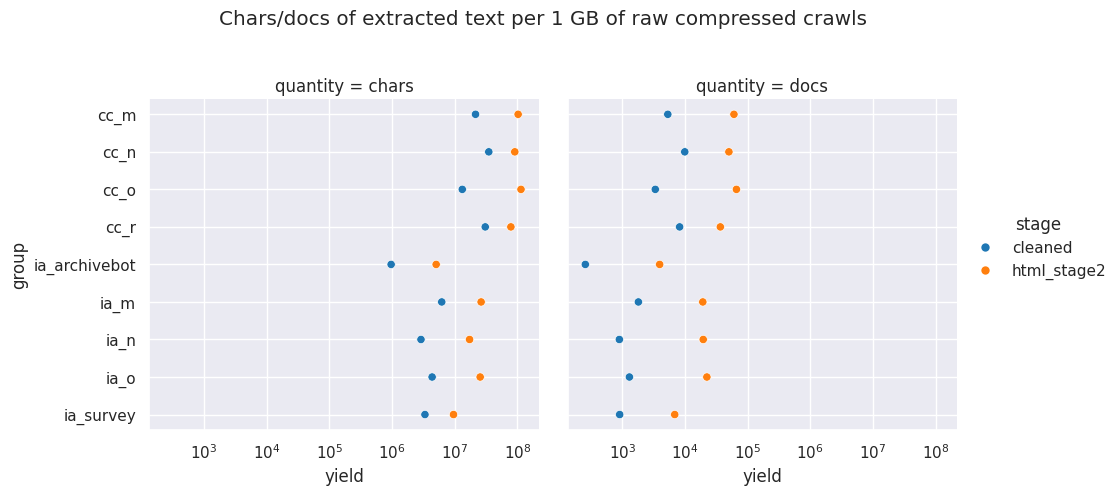

In [115]:
g = sns.relplot(data=pdf, y='group', x='yield', hue='stage', col='quantity')
g.set(xscale='log')

g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Chars/docs of extracted text per 1 GB of raw compressed crawls')

/home/nikolare/anaconda3/envs/jupyterai/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


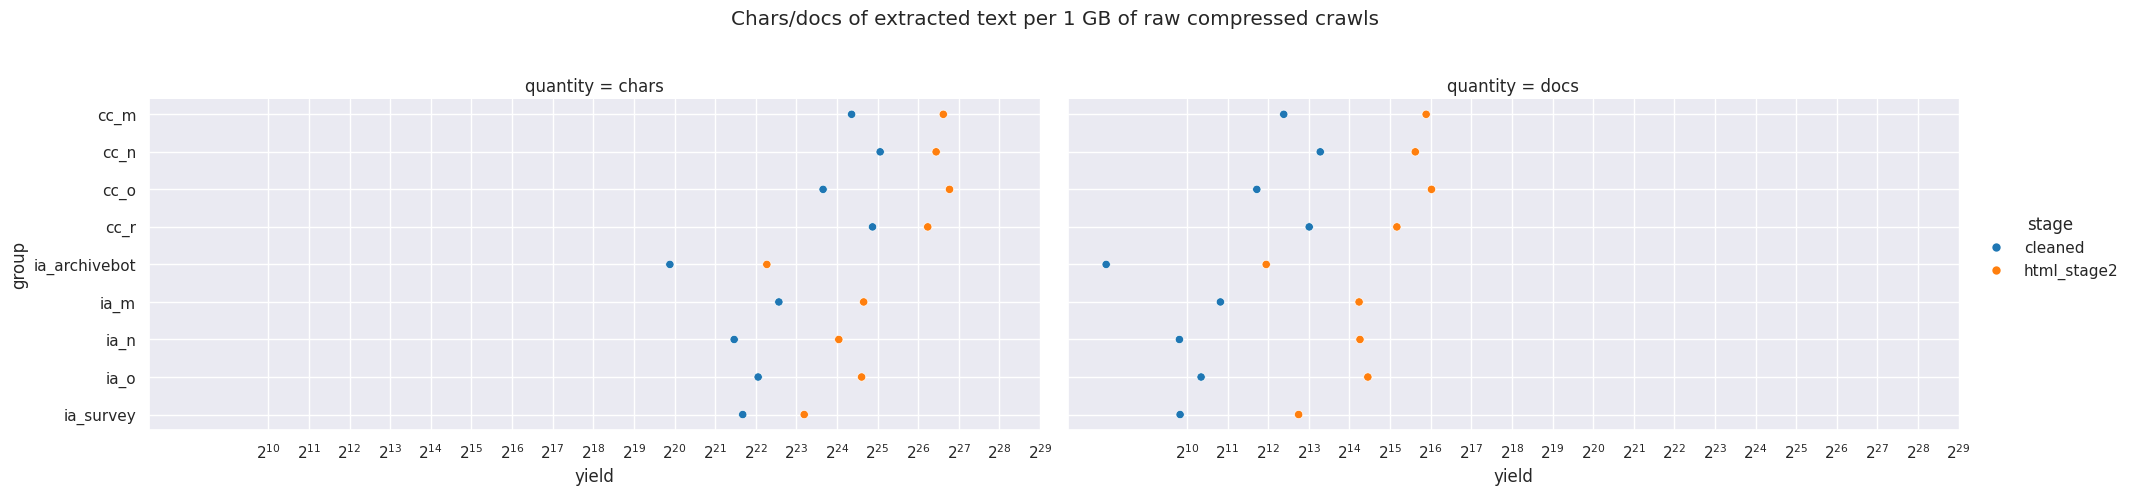

In [116]:
sns.set_context('notebook')
g = sns.relplot(data=pdf, y='group', x='yield', hue='stage', col='quantity',
               aspect=2.0)
g.set(xscale='log')
g.set(xticks=[2**i for i in range(10,30)], xticklabels=[f'$2^{{{i}}}$' for i in range(10,30)])
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Chars/docs of extracted text per 1 GB of raw compressed crawls')
g.savefig('plots/group-yields.pdf')

In [44]:
pdf

stage          group quantity         yield
0       cleaned           cc_m    chars  2.153663e+07
1       cleaned           cc_n    chars  3.506027e+07
2       cleaned           cc_o    chars  1.323730e+07
3       cleaned           cc_r    chars  3.077825e+07
4       cleaned  ia_archivebot    chars  9.691044e+05
5       cleaned           ia_m    chars  6.223746e+06
6       cleaned           ia_n    chars  2.902586e+06
7       cleaned           ia_o    chars  4.370549e+06
8       cleaned      ia_survey    chars  3.359061e+06
9   html_stage2           cc_m    chars  1.030261e+08
10  html_stage2           cc_n    chars  9.112266e+07
11  html_stage2           cc_o    chars  1.145401e+08
12  html_stage2           cc_r    chars  7.896680e+07
13  html_stage2  ia_archivebot    chars  5.069259e+06
14  html_stage2           ia_m    chars  2.645379e+07
15  html_stage2           ia_n    chars  1.731049e+07
16  html_stage2           ia_o    chars  2.554209e+07
17  html_stage2      ia_survey    chars  9.591326e+06
18      cleaned           cc_m     docs  5.335548e+03
19      cleaned           cc_n     docs  9.950523e+03
20      cleaned           cc_o     docs  3.369485e+03
21      cleaned           cc_r     docs  8.239661e+03
22      cleaned  ia_archivebot     docs  2.576404e+02
23      cleaned           ia_m     docs  1.810625e+03
24      cleaned           ia_n     docs  8.994401e+02
25      cleaned           ia_o     docs  1.301922e+03
26      cleaned      ia_survey     docs  9.100446e+02
27  html_stage2           cc_m     docs  6.061795e+04
28  html_stage2           cc_n     docs  5.037822e+04
29  html_stage2           cc_o     docs  6.640879e+04
30  html_stage2           cc_r     docs  3.678049e+04
31  html_stage2  ia_archivebot     docs  3.955110e+03
32  html_stage2           ia_m     docs  1.930201e+04
33  html_stage2           ia_n     docs  1.959998e+04
34  html_stage2           ia_o     docs  2.241701e+04
35  html_stage2      ia_survey     docs  6.879105e+03

In [45]:
wdf = load_crawl_sizes()
wdf

crawl      GB
0    CC-MAIN-2013-20     242
1    CC-MAIN-2013-48     328
2    CC-MAIN-2014-10     340
3    CC-MAIN-2014-15     382
4    CC-MAIN-2014-23     560
..               ...     ...
98         wide00011  420000
99         wide00012  449000
100        wide00015  358000
101        wide00016  768000
102        wide00017  641000

[103 rows x 2 columns]

### Yields for each language

In [90]:
gdf = mdf.reset_index().groupby(['stage','group','lang']).sum(numeric_only=True)
gdf

segments       wcwords         chars  \
stage       group     lang                                                
cleaned     cc_m      ace_Latn      12657.0  1.149733e+06  7.131853e+06   
                      afr_Latn     873972.0  2.433261e+07  1.485206e+08   
                      als_Latn    2464429.0  7.262784e+07  4.320860e+08   
                      amh_Ethi      60105.0  1.685373e+06  8.847786e+06   
                      ara_Arab   55800070.0  9.530586e+08  5.432094e+09   
...                                     ...           ...           ...   
html_stage2 ia_survey yue_Hant    2232178.0  3.510259e+06  4.394870e+07   
                      zho_Hans  607145365.0  1.199958e+09  2.699700e+10   
                      zho_Hant   48936529.0  2.849230e+08  1.345505e+10   
                      zsm_Latn   82362744.0  1.336313e+09  1.384381e+10   
                      zul_Latn    5081405.0  1.089496e+07  8.785575e+07   

                                      docs  
stage       group     lang                  
cleaned     cc_m      ace_Latn      1623.0  
                      afr_Latn     28116.0  
                      als_Latn     68121.0  
                      amh_Ethi      1976.0  
                      ara_Arab    848932.0  
...                                    ...  
html_stage2 ia_survey yue_Hant     50701.0  
                      zho_Hans  33153080.0  
                      zho_Hant   2259591.0  
                      zsm_Latn   1294699.0  
                      zul_Latn   2141937.0  

[3449 rows x 4 columns]

-18 16


/home/nikolare/anaconda3/envs/jupyterai/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


-8 27


/home/nikolare/anaconda3/envs/jupyterai/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


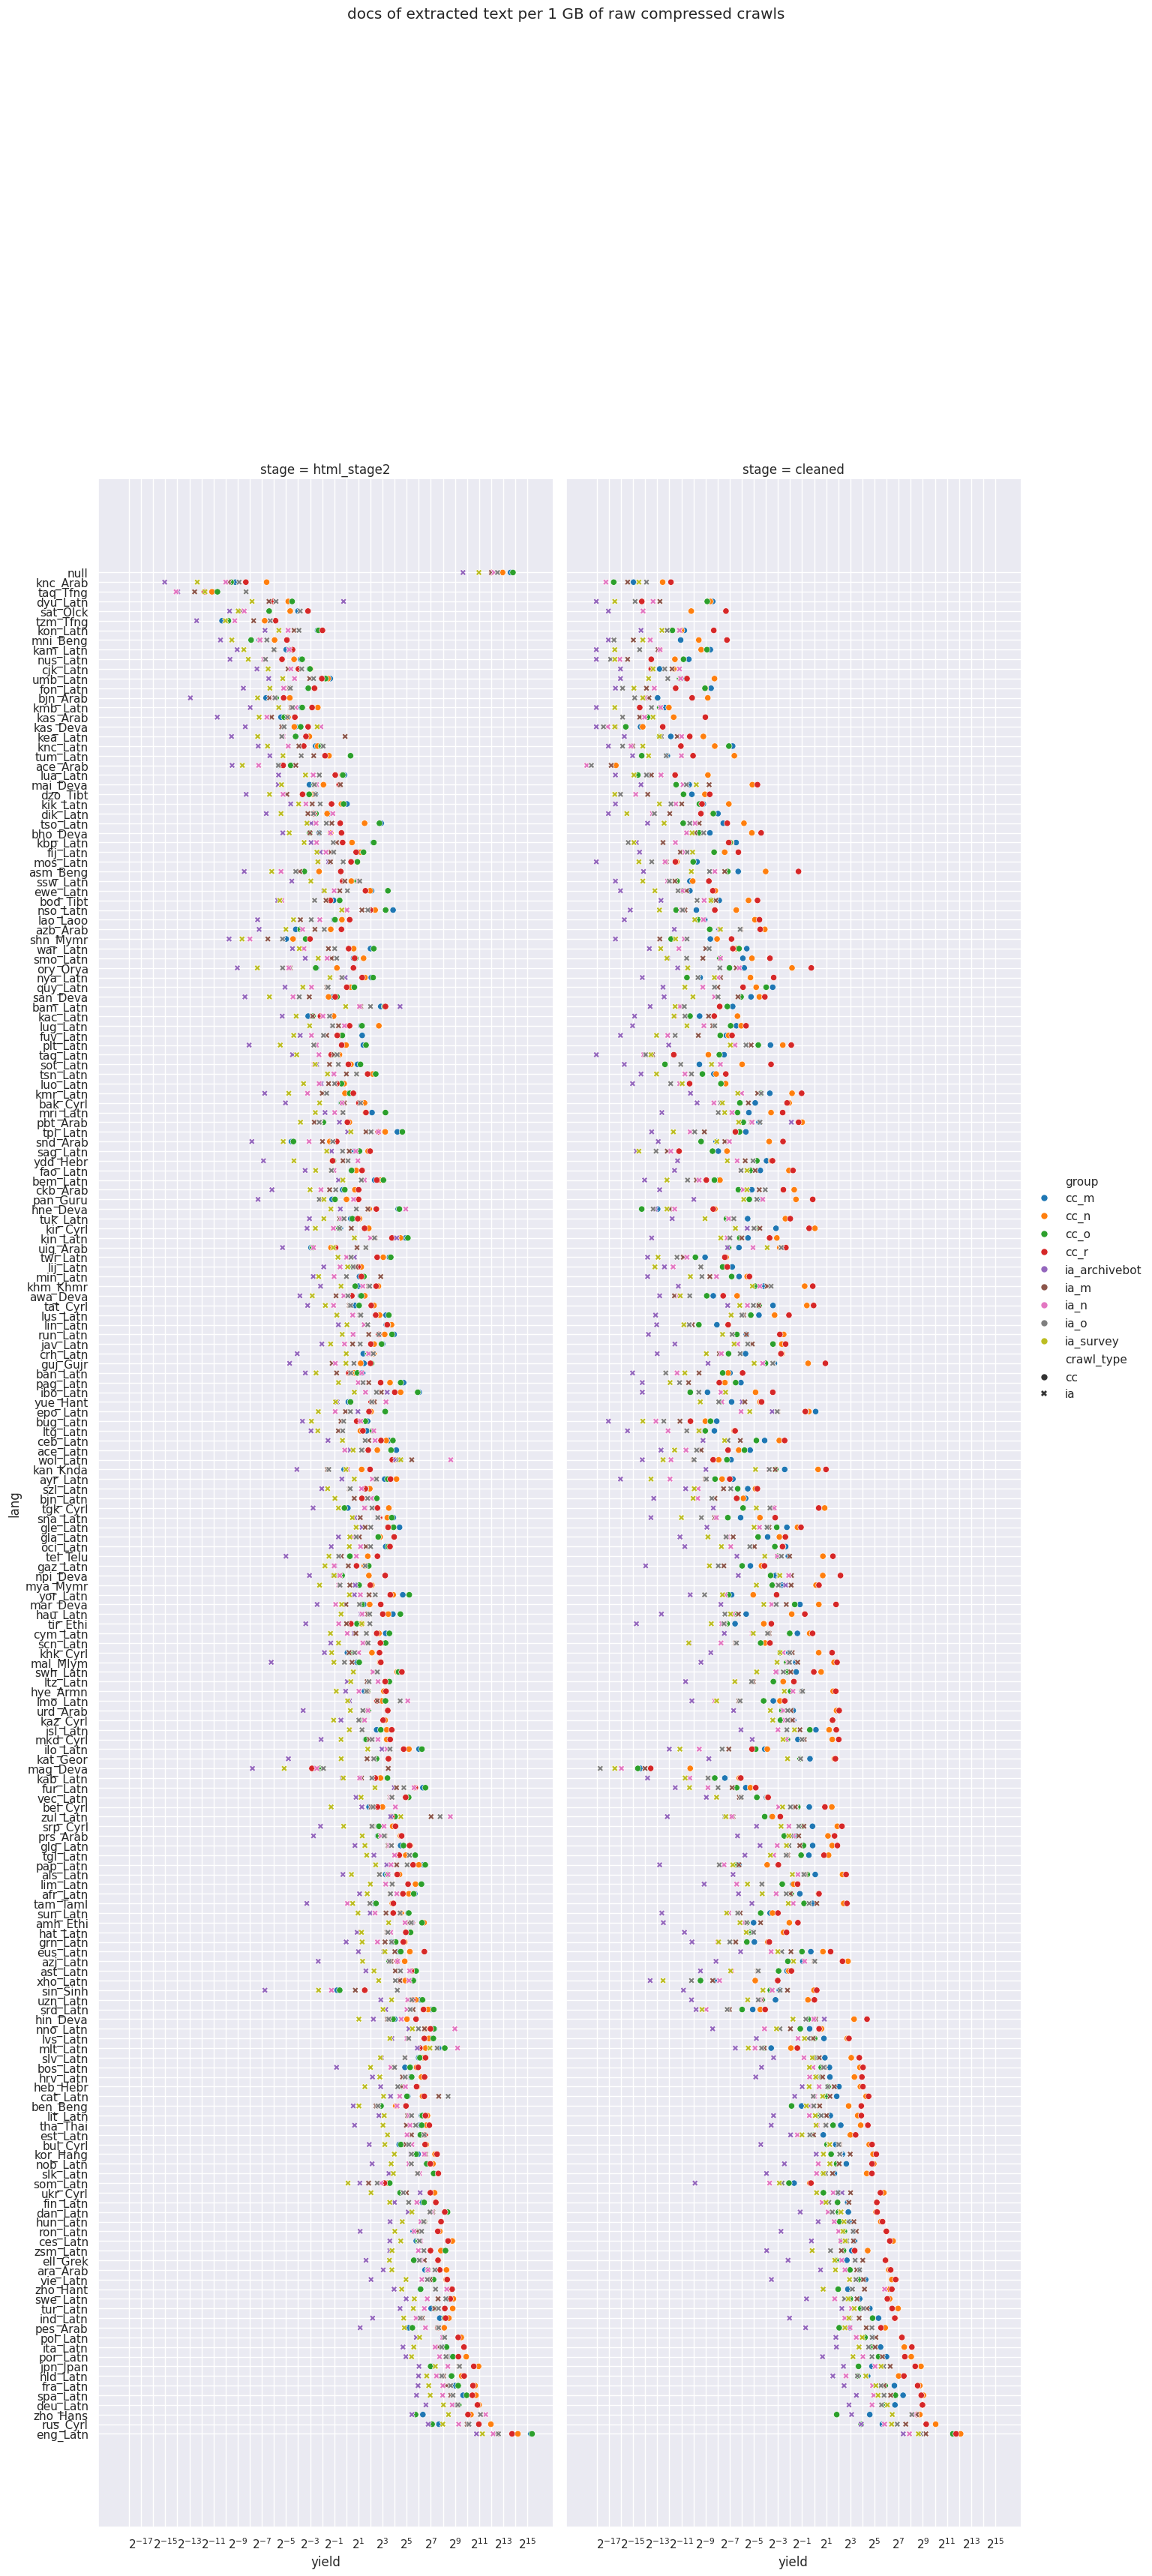

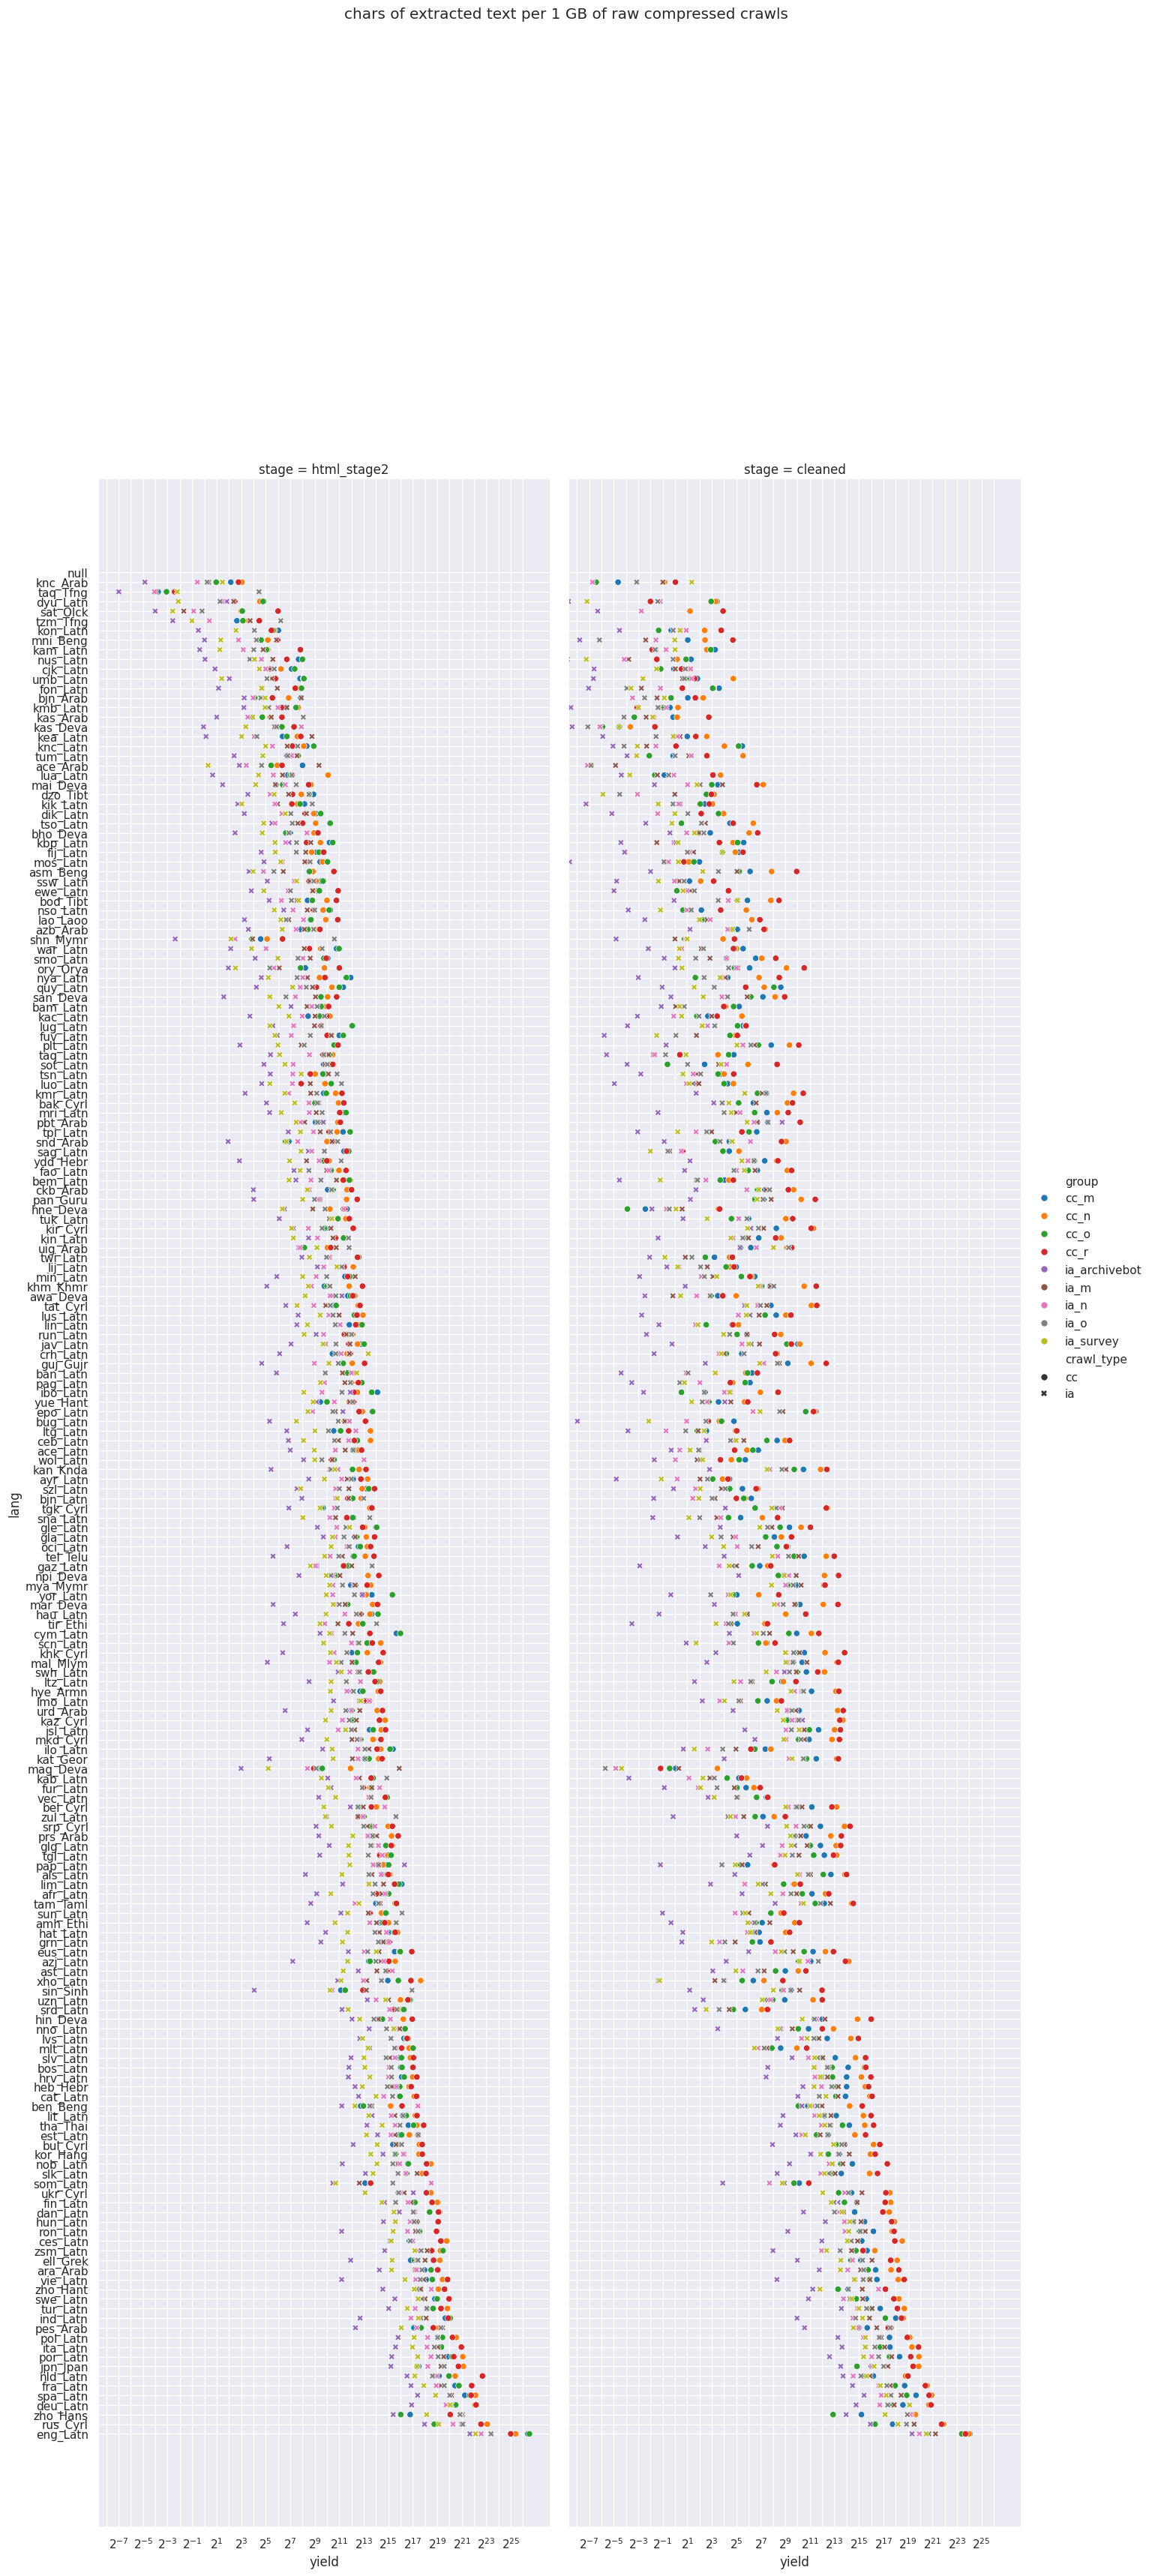

In [106]:
sns.set_context('notebook')

import math
base=2
for quantity in ('docs', 'chars'):
    pdf = gdf.groupby(['stage','lang']).transform(lambda r: r/group_sizes)
    pdf = pdf.reset_index().melt(id_vars=['stage','group','lang'], value_vars=[quantity], 
                                 var_name='quantity',value_name='yield')
    pdf = pdf.set_index('lang').loc[langs_sorted].reset_index()
    pdf['crawl_type'] = pdf.group.str.split('_').str[0]
    max_pow = int(math.log(pdf['yield'].max(), base)+1)
    min_pow = int(math.log(pdf[pdf['yield'] > 0]['yield'].min(), base))
    print(min_pow, max_pow)
    
    g = sns.relplot(data=pdf[pdf.quantity==quantity], 
                    y='lang', x='yield', hue='group', col='stage', style='crawl_type',
                   height=35, aspect=0.2)
    g.set(xscale='log')
    g.set(xticks=[base**i for i in range(min_pow, max_pow)], 
          xticklabels=[f'${base}^{{{i}}}$' if i%2 else '' for i in range(min_pow, max_pow)])
    g.fig.subplots_adjust(top=0.8)
    g.fig.suptitle(f'{quantity} of extracted text per 1 GB of raw compressed crawls')
    g.savefig(f'plots/group-yields-perlang-{quantity}.pdf')